# PROYECTO MACHINE LEARNING
-----------------------------

El presente documento tiene como objeto el desarrollo de un proyecto de machine learning donde se recogen imágenes de cinco estilos arquitectónicos del siglo XX para buscar y entrenar el mejor modelo de clasificación de las cinco categorías. 

Se detalla a continuación la procedencia y características de los datos utilizados.

## PROCEDENCIA DE LOS DATOS

Para el proyecto se han usado dos dataset procedentes de Kaagle:

- Architectural styles, con dos dataset con imágenes etiquetadas en 25 estilos. 
- g-images con imágentes etiquetadas provinientes de google, con los mismos 25 estilos. 

Para este estudio se van a escoger 5 estilos representativos del siglo XX: 

- ART NOUVEAU  . 1890 - 1910. 780 fotografías en diferentes tamaños. <p></p> 

- ART DECO. 1920 - 1930. 766 fotografías de diferentes tamaños. <p></p> 

- ESTILO INTERNACIONAL 1930 - 1970. 627 fotografías en diferentes tamaños. <p></p> 

- POSMODERNISMO 1950 1980. 481 fotografías en diferentes tamaños. <p></p> 

- DECONSTRUCTIVISMO - 1980-2000. 457 fotografías en diferentes tamaños. <p></p> 


Estos dataframe tienen dos procedencias. La primera parte de las fotos proviene del artículo "Architectural Style Classification using Multinomial Latent Logistic Regression" (ECCV2014), hecho por Zhe Xu. La otra parte de las fotos proviene de la descarga de internet. Ambos datos se encuentran etiquetados y su contenido se encuentra en el siguiente enlace:

    * Usuario: https://www.kaggle.com/dumitrux
    * Dataset: https://www.kaggle.com/dumitrux/architectural-styles-dataset


## BREVE DESCRIPCIÓN DE LOS ESTILOS

Se realiza una introducción a los estilos elegidos para este trabajo, todos ellos como se comentaba del siglo XX.

### ART NOUVEAU (MODERNISMO)

- Corriente que se empezó a desarrolar a finales del sigo XIX hasta el siglo XX, (del 1890 al 1920). Un ejemplo en España muy representativo es Gaudí. 

- Representación de la llamada 'belle époque'

- Inspiración en la naturaleza incorporando los avances en materiales como el acero o el cristal. 

- Se proponde democratizar la belleza y que hasta los objetos más cotidianos tuviese valor estético. 

- Uso de líneas curvas y sinuosas, con composiciones asimétricas. 

- Decoración y arquitectura se unen con formas orgánicas. 


### ART DECO

- Movimiento popular entre 1920 y 1939 presente en todas las artes como moda, pintura, diseño, escultura o por supuesto arquitectura.

- El germen surgión en la exposición universal de 1900 de Paris con la formación de un colectivo dedicado a las artes decorativas de vanguardia o modernas como se autoidenficaban.

- Proviene del constructivismo, cubismo y futurismo. 

- Son líneas geometrizadas contundentes, muchas veces aerodinámicas en los bordes, como los aviones. Son composiciones simétricas.

- Con gran presencia de cubos y rascacielos con líneas sólidas.

- Con materiales ocmo el alumnio, acero inoxidable o el cristal y  con especial cudidado en los ornamentos, con el uso de patrones y tipografías visibles.


### ESTILO INTERNACIONAL (RACIONALISMO)

- Se dasorrolló en todo el mundo como su nombre quiere indicar entre 1925 y 1965 como movimiento mayoritario en la primera mitad de siglo.

- Se identifica con los grandes maestros de la arquitectura como Mies van der Rohe o Le Corbusier.

- Arquitectura basada fundamentalmente en la razón de uso, con lineas sencillas y funcionales, basadas en formas geométricas simples (cubo y paralelepípedos, cilindro, esfera)

- Se usan materiales de tipo industrial (acero, hormigón, vidrio, etc)

- Las propuestas son para mejorar el uso que se hace de los espacios valiéndose de los nuevos materiales, sin nada superfluo. 


### POSTMODERNISMO 

- Respuesta al estilo internacional tan sobrio para volver al ingenio, al ornamento y a la referencia, que se desarrola a partir de los años 50, establecido como movimiento en los 70. 

- Se usan ornamentos en fachada, con angulos no ortognales y superficies inusuales. Las cubiertas se dejan de hacer planas para volver a la forma del tejado. 

- Existe una itención de enfatizar los volumenes y llamar la atención. 

- Los estilos se fusionan entre ellos, en el estilo que también es llamado 'neoecléctico' que mezcla diferentes estéticas. 


### DECONSTRUCTIVISMO

- Nace a finales de la década de los 80 y presente hasta hoy. 

- Se caracteriza por fragmentar y conseguir formas no rectilíneas ni planas. Se trata de una apariencia con un caos controlado. 

- Son edificios con multiples capas, con intención de una experimentación formal creando desequilibrios geométricos. 

- Un ejemplo muy reconocible en España es el Guggenheim de Bilbao.


## NOTA PREVIA

Para el desarrollo del proyecto se ha dejado todo el código utilizado, pero se comentan todas la celdas que son de una sóla ejecución, como pueden ser los entrenamientos de los modelos o las modificaciones del dataset. 

## IMPORTACIÓN DE LAS LIBRERÍAS

Lo primero que se hace es importar las diferentes librerías que se van a utilizar, tanto de python como externas, así como los módulos desarrolados para este proyecto. 

In [1]:
import os, sys
import warnings
import pandas as pd
%matplotlib inline

In [2]:
ruta = os.path.dirname(os.getcwd())
sys.path.append(ruta)
warnings.filterwarnings('ignore')
from src.utils.folders_tb import Gestor_archivos
from src.utils.visualization_tb import Plotter
from src.utils.models import Clasificador_ML
from src.utils.mining_data_tb import Organizador

Se definen las clases para el proyecto de clasificación. Además se fija la dimensión de las imágenes para los trabajos de modelado a 250x250 y la semilla base, que se podrá cambiar posteriormente para intentar mejorar los rendimientos.

In [3]:
labels = ['Art Deco', 'Art Nouveau', 'Internacional', 'Posmoderno', 'Deconstructivismo']
img_size = 250
path_data = ruta + os.sep + 'data' + os.sep + 'dataset_original'
seed = 43

In [4]:
gestor = Gestor_archivos()
organizador = Organizador(labels=labels, img_size=img_size)
plotter = Plotter()
clasificador_ml = Clasificador_ML(size=img_size, batch_size=32)

Found 156 files belonging to 5 classes.


## ANALISIS DE LOS DATOS


Se renombran las fotografías con el nombre de la clase y un índice para un mejor tratamiento y manejo de las mismas de forma automatizada. El dataset se compone de los siguientes datos.

In [10]:
df_resumen_dataset = organizador.dataframe_resumen_dataset(ruta + os.sep + 'data' + os.sep + 'dataset_descargado')
gestor.guardar_csv(df_resumen_dataset, ruta=ruta, nombre='dataframe_resumen_dataset.csv')

In [11]:
df_resumen_dataset.head(3)

,filename,metadata
0,deco_482.jpg,"{'img_size': (600, 450, 3), 'img_label': 0}"
1,deco_496.jpg,"{'img_size': (785, 1000, 3), 'img_label': 0}"
2,deco_327.jpg,"{'img_size': (521, 800, 3), 'img_label': 0}"


In [12]:
df_resumen_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3111 entries, 0 to 3110
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   filename  3111 non-null   object
 1   metadata  3111 non-null   object
dtypes: object(2)
memory usage: 48.7+ KB


Se visualizan a continuación unas cuantas imágenes explicativas. 

In [5]:
data_descargado = organizador.get_data_tensor(path=(ruta + os.sep + 'data' + os.sep + 'dataset_descargado'), seed=seed, validation_split=None, subset=None)

Found 3111 files belonging to 5 classes.


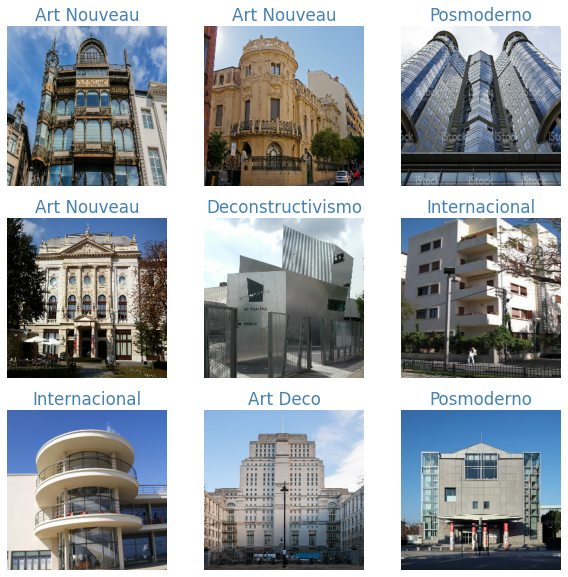

In [23]:
fig = plotter.visualiza_fotos(data_descargado)
plotter.guardar_figura(fig, 'muestra_imágenes_dataset', ruta)

Las fotografías tienen diferentes tamaños, la mayoría en color. Se estandarizarán su tratamiento a un tamaño 250x250 en color. Hay varias imágenes de los edificios más representativos, sacadas desdde diferentes ángulos o con diferentes encudres. 

No se aprecia ningún elemento extraño en el conjunto, por lo que el dataset se considera limpio y listo para ser utilizado. Sin embargo se quiere aumentar un poco el dataset y equilibrarlo, por lo que lo primero que se realizará es data augmentation con ese fin. 

## DATA AUGMENTATION

Se utiliza el organizador de imagenes para hacer Data augmentation y llegar a 1000 imágenes por clase. De esta forma se aumentan de la siguiente forma: 

- 220 de Art_Nouveau
- 235 de Art_Deco
- 373 de Estilo_Internacional
- 519 de Postmodernismo
- 543 de Deconstructivismo

Se cargan primero las fotos de cada una de las etiquetas. 

In [5]:
"""
images_deco = organizador.carga_imagenes_etiqueta(data_dir=path_data, label=labels[0])
images_nouveau = organizador.carga_imagenes_etiqueta(data_dir=path_data, label=labels[1])
images_intern = organizador.carga_imagenes_etiqueta(data_dir=path_data, label=labels[2])
images_postm = organizador.carga_imagenes_etiqueta(data_dir=path_data, label=labels[3])
images_decons = organizador.carga_imagenes_etiqueta(data_dir=path_data, label=labels[4])
"""


Para la generación de las imágenes se ha utilizado un generado de imágenes nuevas de la clase `ImageDataGenerator` y se guarda el número de imágenes deseadas en el directorio del dataframe con el nombre **label_aug**. 


In [6]:
"""
organizador.genera_nuevos(images=images_deco, save_path=(path_data + os.sep + labels[0]), save_prefix='deco_aug', number=235, color=True)
organizador.genera_nuevos(images=images_nouveau, save_path=(path_data + os.sep + labels[1]), save_prefix='nouveau_aug', number=220, color=True)
organizador.genera_nuevos(images=images_intern, save_path=(path_data + os.sep + labels[2]), save_prefix='intern_aug', number=373, color=True)
organizador.genera_nuevos(images=images_postm, save_path=(path_data + os.sep + labels[3]), save_prefix='postm_aug', number=519, color=True)
organizador.genera_nuevos(images=images_decons, save_path=(path_data + os.sep + labels[4]), save_prefix='decons_aug', number=543, color=True)
"""

Las imágenes se generan de manera aleatoria cambiando los parámetros de rotación, zoom o color, alternando al azar entre los siguientes parámetros: <p><p>

- `rotation_range = 30`     Rotación de las imágenes con un ángulo de 30 grados. <p><p>
- `zoom_range = 0.2`        Zoom con un porcentaje de un 20% tanto para alejar como para acercar. <p><p>
- `width_shift_range=0.1`   Cambio en la proporción de anchura con un 10% de variación. <p><p>
- `height_shift_range=0.1`  Cambio en la proporción de altura con un 10% de variación. <p><p>
- `horizontal_flip = True`  Gira horizontalmente de manera aleatoria. <p><p>
- `fill_mode="nearest"`     Se rellenan las zonas que se crean nuevas con el criterio de píxeles más cercanos. <p><p>
- `shear_range=0.15`        Ángulo de corte en dirección de las agujas del reloj. <p><p>
- `vertical_flip=False`     Se desactiva el giro vertical. <p><p>

El dataset se queda entonces de esta forma. 

Found 10 files belonging to 5 classes.


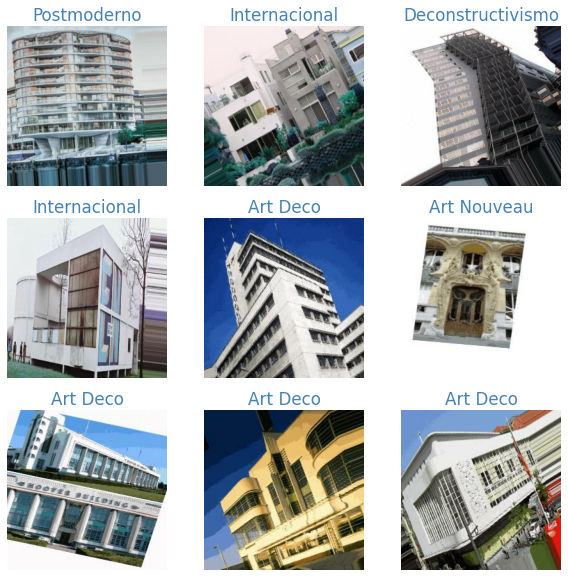

In [156]:
data_aumentado = organizador.get_data_tensor(path=(ruta + os.sep + 'data' + os.sep + 'data_ejemplo_augmentation'), seed=seed, validation_split=None, subset=None)
fig = plotter.visualiza_fotos(data_)
plotter.guardar_figura(fig, 'muestra_imágenes_dataset_aumentado', ruta)

## SEPARACIÓN DE LOS CONJUNTOS DE ENTRENAMIENTO Y TEST

 Se separan las imágenes en conjuntos de entrenamiento y de test de manera aleatoria, guardando ambos fragmentos del dataset en el ordenador para utilizarlos con cada uno de los modelos. Se comenta la celda nuevamente para evitar ejecutar dos veces los pasos previos.

In [7]:
"""
organizador.separa_train_test(path_data, test_ratio=0.10)
"""

## CARGA DE LOS DATOS

Se cargan las imágenes y sus etiquetas para empezar a trabajar con ellas. Primero se cargan los datos para los modelos de clasificación y luego para las  como tensor generador con batches de 32 fotografías. Se hace para los respectivos conjuntos de entrenamiento y test. Se normalizan y estandarizan las fotografías durante el proceso de carga, revisando la forma y color para unificar todos los conjuntos para poder entrenar los modelos.

In [5]:
path_train = ruta + os.sep + 'data' + os.sep + 'dataset_original_train'
path_test = ruta + os.sep + 'data' + os.sep + 'dataset_original_test'
path_modelos = ruta + os.sep + 'models'
path_resources = ruta + os.sep + 'resources'

In [6]:
x_train, y_train = organizador.get_data(data_dir=path_train, flatten=True, color=True)
x_test, y_test = organizador.get_data(data_dir=path_test, flatten=True, color=True)
train_test = (x_train, x_test, y_train, y_test)

In [7]:
data_train_rnn = organizador.get_data_tensor(path=path_train, seed=seed, validation_split=0.2, subset='training')
data_val_rnn = organizador.get_data_tensor(path=path_train, seed=seed, validation_split=0.2, subset='validation')
data_test_rnn = organizador.get_data_tensor(path=path_test, seed=seed, validation_split=None, subset=None)


Found 4496 files belonging to 5 classes.
Using 3597 files for training.
Found 4496 files belonging to 5 classes.
Using 899 files for validation.
Found 505 files belonging to 5 classes.


Para el cálculo con redes neuronales además se optimizan los datos para un mejor rendimiento del cálculo con el parámetro AUTOTUNE.

In [8]:
data_train_rnn = organizador.configure_for_performance(data_train_rnn)
data_val_rnn = organizador.configure_for_performance(data_val_rnn)
data_test_rnn = organizador.configure_for_performance(data_test_rnn)

## MODELO BASE. REGRESIÓN LINEAL

Se establece como modelo base un modelo de regresión logística y se entrena. Se guardarán todos los modelos entrenados en la carpeta models una vez terminado el proceso. El modelo base tiene como parámetros 10 iteraciones, sin penalizador y con solver `lbfgs`. 

In [ ]:
"""
modelo_base_rl = clasificador_ml.genera_modelo(kind='logistic', seed=seed, max_iter=10, penalty='none', solver='lbfgs')
rl = clasificador_ml.entrena_modelo(model=modelo_base_rl, seed=seed, train_test=train_test, cv=None, fit=True)
gestor.guarda_pickle(modelo_base_rl, path_modelos, 'modelo_base_rl_data_origin.sav')
"""

Se comprueba qué porcentaje de acierto tiene tanto en el entrenamiento como en el test. Como representación gráfica de aciertos se calcula la matriz de confusión tanto de entrenamiento como de test también. 

In [ ]:
modelo_base_rl = gestor.carga_pickle(path_modelos, 'modelo_base_rl_data_origin.sav')
predicciones = clasificador_ml.indicativos_clasificacion(modelo_base_rl, train_test=train_test)



PORCENTAJES----------------------------------------------------------
El score de acierto en el test es de: 0.35247524752475246
El score de acierto en el entrenamiento es de: 0.3734430604982206


MATRIZ_CONFUSION TEST ------------------------------------------------
[[40 26  8 10 17]
 [24 52 10  8  7]
 [25 22 18 24 12]
 [15 14  9 37 26]
 [17 21 12 20 31]]


MATRIZ_CONFUSION ENTRENAMIENTO ---------------------------------------
[[348 243 101 113  95]
 [155 496  58  97  93]
 [189 181 219 194 116]
 [167 158  95 313 166]
 [186 153  91 166 303]]




Se coge un conjunto de prueba de aproximadamente un tercio para comprobar de manera más eficiente la diferencia en el entrenamiento de los modelos y posteriormente hacer los cálculos con todos los datos con los mejores modelos. Se comprueban aún así los resultados con el modelo base para comprobar si difiere mucho entrenando con la muestra. Se guardan los conjuntos de muestra en la carpeta resources para que esté accesible para todas las pruebas.

In [8]:
"""
x_muestra, y_muestra = organizador.get_data(data_dir=path_train, flatten=True, color=True, muestra=1200)
train_test_muestra = (x_muestra, x_test, y_muestra, y_test)
gestor.guarda_pickle(train_test_muestra, path_resources, 'train_test_muestra.sav')
"""

In [9]:
train_test_muestra = gestor.carga_pickle(path_resources, 'train_test_muestra.sav')

In [11]:
"""
modelo_base_rl_m = clasificador_ml.genera_modelo(kind='logistic', seed=seed, max_iter=10, penalty='none', solver='lbfgs')
rl_m = clasificador_ml.entrena_modelo(model=modelo_base_rl_m, seed=seed, train_test=train_test_muestra, cv=None, fit=True)
gestor.guarda_pickle(modelo_base_rl_m, path_modelos, 'modelo_base_rl_m_data_origin.sav')
"""

In [12]:
modelo_base_rl_m = gestor.carga_pickle(path_modelos, 'modelo_base_rl_m_data_origin.sav')
predicciones = clasificador_ml.indicativos_clasificacion(modelo_base_rl_m, train_test=train_test_muestra)



PORCENTAJES----------------------------------------------------------
El score de acierto en el test es de: 0.3188118811881188
El score de acierto en el entrenamiento es de: 0.4475


MATRIZ_CONFUSION TEST ------------------------------------------------
[[32 25 13 18 13]
 [30 41  7 12 11]
 [16 14 14 34 23]
 [15  6 10 40 30]
 [14 12  9 32 34]]


MATRIZ_CONFUSION ENTRENAMIENTO ---------------------------------------
[[103  39  27  37  24]
 [ 43 143  16  34  28]
 [ 42  27  73  63  49]
 [ 33  16  12 120  43]
 [ 30  25  31  44  98]]




Con las fotografías de muestra los resultados para el test son similares, de forma que los modelos que mejor funcionen con la muestra de 1200 fotografías son los que se entranarán con todo el conjunto. 

### REGRESIÓN LINEAL CON DIFERENTES PARÁMETROS Y CROSS VALIDATION (GRID SEARCH)

Se ejecuta un grid search con diferentes parámetros buscando la mejor configuración de la regresión lineal. Se marcan 3 grupos para cross validation, y los parámetros que se prueban son los siguientes:

- `penalty =  ['l1', 'l2']` <p><p>

- `C =  [0.01, 0.1, 0.5, 1]`

In [ ]:
"""
grid_rl = clasificador_ml.grid_search(kind='logistic', X_train=train_test_muestra[0], y_train=train_test_muestra[2])
gestor.guarda_pickle(grid_rl, path_modelos, 'grid_rl_data_origin.sav')
"""

Una vez se ha entrenado se comprueban los resultados.

In [11]:
grid_rl = gestor.carga_pickle(path_modelos, 'grid_rl_data_origin.sav')
clasificador_ml.resultados_grid(grid_rl, train_test_muestra)

Pipeline(steps=[('classifier', LogisticRegression(C=0.1))])
{'classifier': LogisticRegression(C=0.1), 'classifier__C': 0.1, 'classifier__penalty': 'l2'}
0.32749999999999996


PORCENTAJES----------------------------------------------------------
El score de acierto en el test es de: 0.3702970297029703
El score de acierto en el entrenamiento es de: 1.0


MATRIZ_CONFUSION TEST ------------------------------------------------
[[39 16 17 12 17]
 [16 43 18  8 16]
 [11 14 35 16 25]
 [16 16 16 34 19]
 [19 17 10 19 36]]


MATRIZ_CONFUSION ENTRENAMIENTO ---------------------------------------
[[230   0   0   0   0]
 [  0 264   0   0   0]
 [  0   0 254   0   0]
 [  0   0   0 224   0]
 [  0   0   0   0 228]]




Se mejora el resultado del modelo base en un 5,2% con los parámetros:

- `C=0.1` <p><p>
- `penalty l2` 

Sin embargo aumenta el score de entrenamiento a 1, con lo que el modelo se está sobreentrenando sin conseguir gran mejora en los datos. Se van a probar diferentes semillas a continuación con el modelo base. Las semillas se escogen de manera aleatoria. 

### REGRESIÓN LOGÍSTICA CON DIFERENTES SEMILLAS

In [32]:
"""
modelos = clasificador_ml.genera_modelos_semillas(numero=5, kind='logistic', train_test=train_test_muestra, max_iter=10, penalty='none', solver='lbfgs')
gestor.guarda_pickle(modelos, path_modelos, 'modelos_rl_semillas_data_origin.sav')
"""

Las semillas elegidas para los modelos son: [54185, 19294, 19966, 74724, 34541]


In [11]:
modelos = gestor.carga_pickle(path_modelos, 'modelos_rl_semillas_data_origin.sav')
clasificador_ml.resultado_modelos(modelos=modelos, train_test=train_test_muestra)

Para el modelo LogisticRegression(max_iter=10, n_jobs=-1, penalty='none', random_state=54185) el modelo tiene estos resultados ##############################
El score de acierto en el test es de: 0.3188118811881188
El score de acierto en el entrenamiento es de: 0.4475


Para el modelo LogisticRegression(max_iter=10, n_jobs=-1, penalty='none', random_state=19294) el modelo tiene estos resultados ##############################
El score de acierto en el test es de: 0.3188118811881188
El score de acierto en el entrenamiento es de: 0.4475


Para el modelo LogisticRegression(max_iter=10, n_jobs=-1, penalty='none', random_state=19966) el modelo tiene estos resultados ##############################
El score de acierto en el test es de: 0.3188118811881188
El score de acierto en el entrenamiento es de: 0.4475


Para el modelo LogisticRegression(max_iter=10, n_jobs=-1, penalty='none', random_state=74724) el modelo tiene estos resultados ##############################
El score de acierto en el tes

No se consigue ninguna mejora en este caso con las semillas. Se produce mucho sobreentrenamiento como en el modelo del grid search sin gran mejora del resultado con lo que no se considera un buen modelo. Se prueba con diferente número de iteraciones, con los valores de 10, 100 y 900.

### REGRESIÓN LOGISTICA CON DIFERENTE NÚMERO DE ITERACIONES MÁXIMAS PARA CONVERGER

In [16]:
"""
modelos_rl_max_iter = clasificador_ml.itera_max_iter_rl(max_iter=[10, 100, 900], train_test=train_test_muestra, penalty='none', solver='lbfgs', seed=seed)
gestor.guarda_pickle(modelos_rl_max_iter, path_modelos, 'modelos_rl_max_iter_data_origin.sav')
"""

"\nmodelos_rl_max_iter = clasificador_ml.itera_max_iter_rl(max_iter=[10, 100, 900], train_test=train_test_muestra, penalty='none', solver='lbfgs', seed=seed)\ngestor.guarda_pickle(modelos_rl_max_iter, path_modelos, 'modelos_rl_max_iter.sav')\n"

In [17]:
modelos_rl_max_iter = gestor.carga_pickle(path_modelos, 'modelos_rl_max_iter_data_origin.sav')
clasificador_ml.resultado_modelos(modelos=modelos_rl_max_iter, train_test=train_test_muestra)

Para el modelo LogisticRegression(max_iter=10, n_jobs=-1, penalty='none', random_state=43) el modelo tiene estos resultados ##############################
El score de acierto en el test es de: 0.3188118811881188
El score de acierto en el entrenamiento es de: 0.4475


Para el modelo LogisticRegression(n_jobs=-1, penalty='none', random_state=43) el modelo tiene estos resultados ##############################
El score de acierto en el test es de: 0.3445544554455445
El score de acierto en el entrenamiento es de: 1.0


Para el modelo LogisticRegression(max_iter=900, n_jobs=-1, penalty='none', random_state=43) el modelo tiene estos resultados ##############################
El score de acierto en el test es de: 0.3445544554455445
El score de acierto en el entrenamiento es de: 1.0


El máximo score en el entrenamiento es 1.0 con el modelo LogisticRegression(n_jobs=-1, penalty='none', random_state=43)
El máximo score en el entrenamiento es 0.3445544554455445 con el modelo LogisticRegression(n_j

El modelo cmejora a un 34,45% subiendo las iteraciones. Como entre 100 y 900 sería suficiente con `100 iteraciones`. De todas formas el mejor modelo de regresión lineal sería el del grid search con un 37%. Se prueban otros modelos para poder comparar entre ellos y seguir avanzando con el que mejor resultados obtenga.

## Modelo KNN

El algoritmo de KNN se basa en la clasificación a partir de la agrupación del número K de vecinos más cercanos. Se prueba una primera configuración del algoritmo con los parámetros de la configuración por defecto, que se supone que es la óptima mayoritariamente; los parámetros son:
- `k=5` <p><p>
- `weights='uniform'` <p><p>
- `algorithm='auto'` <p><p>
- `leaf_size=30` <p><p>
- `p=2` <p><p>
- `metric='minkowski'` <p><p>
- `metric_params=None`

In [20]:
"""
modelo_knn = clasificador_ml.genera_modelo(kind='knn', seed=seed)
knn = clasificador_ml.entrena_modelo(model=modelo_knn, seed=seed, train_test=train_test_muestra, cv=None, fit=True)
gestor.guarda_pickle(modelo_knn, path_modelos, 'modelo_knn_data_origin.sav')
"""

In [12]:
modelo_knn = gestor.carga_pickle(path_modelos, 'modelo_knn_data_origin.sav')
predicciones = clasificador_ml.indicativos_clasificacion(modelo_knn, train_test=train_test_muestra)



PORCENTAJES----------------------------------------------------------
El score de acierto en el test es de: 0.29108910891089107
El score de acierto en el entrenamiento es de: 0.5233333333333333


MATRIZ_CONFUSION TEST ------------------------------------------------
[[34 12 12 22 21]
 [26 31  5 21 18]
 [23 12 13 28 25]
 [19  7 15 42 18]
 [23  8 13 30 27]]


MATRIZ_CONFUSION ENTRENAMIENTO ---------------------------------------
[[138  15  14  29  34]
 [ 52 129  13  41  29]
 [ 39  16 116  47  36]
 [ 20  14  20 144  26]
 [ 29  18  23  57 101]]




Knn da peores resultados que la regresión lineal con los mismos datos, muy cercana al porcenaje de elegir una clase al azar, que es el 20%. Se prueba a cambiar los parámetros del algoritmo para intentar subir el porcentaje de acierto (accuracy).


### KNN CON DIFERENTES PARÁMETROS Y CROSS VALIDATION. (GRID SEARCH)

Se planeta un grid search con 3 iteraciones de cross validation y los siguientes parámetros de prueba:

- `n_neighbors =  [3, 5, 11, 19]` <p><p>
- `weights =  ['uniform', 'distance']` <p><p>
- `metric =  ('euclidean', 'manhattan')`

In [13]:
"""
grid_knn = clasificador_ml.grid_search(kind='knn', X_train=train_test_muestra[0], y_train=train_test_muestra[2])
gestor.guarda_pickle(grid_knn, path_modelos, 'grid_knn_data_origin.sav')
"""

Fitting 3 folds for each of 16 candidates, totalling 48 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed: 93.4min finished


In [14]:
grid_knn = gestor.carga_pickle(path_modelos, 'grid_knn_data_origin.sav')
clasificador_ml.resultados_grid(grid_knn, train_test_muestra)


Pipeline(steps=[('classifier',
                 KNeighborsClassifier(metric='manhattan', n_neighbors=19,
                                      weights='distance'))])
{'classifier': KNeighborsClassifier(metric='manhattan', n_neighbors=19, weights='distance'), 'classifier__metric': 'manhattan', 'classifier__n_neighbors': 19, 'classifier__weights': 'distance'}
0.32583333333333336


PORCENTAJES----------------------------------------------------------
El score de acierto en el test es de: 0.403960396039604
El score de acierto en el entrenamiento es de: 1.0


MATRIZ_CONFUSION TEST ------------------------------------------------
[[40  9  8 21 23]
 [19 47  2 16 17]
 [15  5 27 23 31]
 [14  0  7 43 37]
 [12  8 10 24 47]]


MATRIZ_CONFUSION ENTRENAMIENTO ---------------------------------------
[[230   0   0   0   0]
 [  0 264   0   0   0]
 [  0   0 254   0   0]
 [  0   0   0 224   0]
 [  0   0   0   0 228]]




Con los parámetros de:

- `metric='manhattan'` <p><p>
- `n_neighbors=19` <p><p>
- `weights='distance'` <p><p>

se han conseguido los mejores resultados que con el modelo que teníamos de base de regresión logística, con un 40% de acierto con el test, aunque tiene un sobreentrenamiento muy alto. Se prueba ahora con un modelo SVC.


## Modelo SVC

Al igual que con el algorito KNN se prueba en primer lugar el algoritmo con la configuración predeterminada. Los parámetros son: 

- `C=1.0` <p><p>
- `kernel='rbf'` <p><p>
- `degree=3` <p><p>
- `gamma='scale'` <p><p>
- `coef0=0.0` <p><p>
- `shrinking=True` <p><p>
- `probability=False` <p><p>
- `tol=0.001, cache_size=200` <p><p>
- `class_weight=None` <p><p>
- `verbose=False` <p><p>
- `max_iter=- 1` <p><p>
- `decision_function_shape='ovr'` <p><p>
- `break_ties=False`

In [15]:
"""
modelo_svc = clasificador_ml.genera_modelo(kind='svc', seed=seed)
svc = clasificador_ml.entrena_modelo(model=modelo_svc, seed=seed, train_test=train_test_muestra, cv=None, fit=True)
gestor.guarda_pickle(modelo_svc, path_modelos, 'modelo_svc_data_origin.sav')
"""

In [16]:
modelo_svc = gestor.carga_pickle(path_modelos, 'modelo_svc_data_origin.sav')
predicciones = clasificador_ml.indicativos_clasificacion(modelo_svc, train_test=train_test_muestra)



PORCENTAJES----------------------------------------------------------
El score de acierto en el test es de: 0.27524752475247527
El score de acierto en el entrenamiento es de: 1.0


MATRIZ_CONFUSION TEST ------------------------------------------------
[[ 10  91   0   0   0]
 [  0 101   0   0   0]
 [  0  87  14   0   0]
 [  0  91   0  10   0]
 [  0  97   0   0   4]]


MATRIZ_CONFUSION ENTRENAMIENTO ---------------------------------------
[[230   0   0   0   0]
 [  0 264   0   0   0]
 [  0   0 254   0   0]
 [  0   0   0 224   0]
 [  0   0   0   0 228]]




De base SVC acierta menos que los anteriores modelos, además muy sobreentrenado. Se prueba con diferentes semillas para comprobar si se puede mejorar con el cambio.

## SVC CON DIFERENTES SEMILLAS

Se prueba el modelo con un generador de semillas aleatorio, entrenando para 5 diferentes sendos modelos. 

In [18]:
"""
modelos_svc_semillas = clasificador_ml.genera_modelos_semillas(numero=5, kind='svc', train_test=train_test_muestra)
gestor.guarda_pickle(modelos_svc_semillas, path_modelos, 'modelos_svc_semillas_data_origin.sav')
"""

Las semillas elegidas para los modelos son: [39095, 85951, 41047, 85884, 77579]


In [12]:
modelos_svc_semillas = gestor.carga_pickle(path_modelos, 'modelos_svc_semillas_data_origin.sav')
clasificador_ml.resultado_modelos(modelos=modelos_svc_semillas, train_test=train_test_muestra)

Para el modelo SVC(C=1, gamma=0.1, random_state=39095) el modelo tiene estos resultados ##############################
El score de acierto en el test es de: 0.27524752475247527
El score de acierto en el entrenamiento es de: 1.0


Para el modelo SVC(C=1, gamma=0.1, random_state=85951) el modelo tiene estos resultados ##############################
El score de acierto en el test es de: 0.27524752475247527
El score de acierto en el entrenamiento es de: 1.0


Para el modelo SVC(C=1, gamma=0.1, random_state=41047) el modelo tiene estos resultados ##############################
El score de acierto en el test es de: 0.27524752475247527
El score de acierto en el entrenamiento es de: 1.0


Para el modelo SVC(C=1, gamma=0.1, random_state=85884) el modelo tiene estos resultados ##############################
El score de acierto en el test es de: 0.27524752475247527
El score de acierto en el entrenamiento es de: 1.0


Para el modelo SVC(C=1, gamma=0.1, random_state=77579) el modelo tiene estos res

Las semillas no afectan en nada al resultado del modelo. Se prueba diferentes parámetros con cross validation para intentar mejorar el modelo SVC

### SVC CON DIFERENTES PARÁMETROS (GRID SEARCH)

Se prueba con tres iteraciones para cross validation y los siguientes parámetros en el grid search:

- `kernel = ['linear', 'rbf', 'sigmoid']` <p><p>
- `C = [0.001, 1, 10]` <p><p>
- `gamma =  ['scale', 'auto']`

In [22]:
"""
grid_svc = clasificador_ml.grid_search(kind='svc', X_train=train_test_muestra[0], y_train=train_test_muestra[2])
gestor.guarda_pickle(grid_svc, path_modelos, 'grid_svc_data_origin.sav')
"""

Fitting 3 folds for each of 18 candidates, totalling 54 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed: 101.0min
[Parallel(n_jobs=-1)]: Done  54 out of  54 | elapsed: 131.5min finished


In [11]:
grid_svc = gestor.carga_pickle(path_modelos, 'grid_svc_data_origin.sav')
clasificador_ml.resultados_grid(grid_svc, train_test_muestra)

Pipeline(steps=[('classifier', SVC(C=10))])
{'classifier': SVC(C=10), 'classifier__C': 10, 'classifier__gamma': 'scale', 'classifier__kernel': 'rbf'}
0.3841666666666666


PORCENTAJES----------------------------------------------------------
El score de acierto en el test es de: 0.43366336633663366
El score de acierto en el entrenamiento es de: 0.9991666666666666


MATRIZ_CONFUSION TEST ------------------------------------------------
[[40 22 12 14 13]
 [21 53 13  6  8]
 [ 7 13 45 18 18]
 [15  9 15 44 18]
 [14  9 21 20 37]]


MATRIZ_CONFUSION ENTRENAMIENTO ---------------------------------------
[[230   0   0   0   0]
 [  0 264   0   0   0]
 [  0   0 253   1   0]
 [  0   0   0 224   0]
 [  0   0   0   0 228]]




El porcentaje de acierto con el test es de un 43%, que mejora mucho el resultado del modelo SVC básico, con los siguientes parámetros:

- `parámetros C=10` <p><p>
- `gamma='scale'` <p><p>
- `kernel='rbf'`

Es el modelo con más acierto hasta el momento. Se continua probando el modelo Random Forest. 

## Modelo Random Forest

Se prueba el modelo random forest con los parámetros por defecto: 

- `n_estimators=100` <p><p>
- `criterion='gini'` <p><p>
- `max_depth=None` <p><p>
- `min_samples_split=2` <p><p>
- `min_samples_leaf=1` <p><p>
- `min_weight_fraction_leaf=0.0` <p><p>
- `max_features='auto'` <p><p>
- `max_leaf_nodes=None` <p><p>
- `min_impurity_decrease=0.0` <p><p>
- `min_impurity_split=None` <p><p>
- `bootstrap=True` <p><p>
- `oob_score=False` <p><p>
- `warm_start=False` <p><p>
- `ccp_alpha=0.0` 


In [11]:
"""
modelo_forest = clasificador_ml.genera_modelo(kind='forest', seed=seed)
forest = clasificador_ml.entrena_modelo(model=modelo_forest, seed=seed, train_test=train_test_muestra, cv=None, fit=True)
gestor.guarda_pickle(modelo_forest, path_modelos, 'modelo_forest_data_origin.sav')
"""

In [12]:
modelo_forest = gestor.carga_pickle(path_modelos, 'modelo_forest_data_origin.sav')
predicciones = clasificador_ml.indicativos_clasificacion(modelo_forest, train_test=train_test_muestra)



PORCENTAJES----------------------------------------------------------
El score de acierto en el test es de: 0.2891089108910891
El score de acierto en el entrenamiento es de: 0.9391666666666667


MATRIZ_CONFUSION TEST ------------------------------------------------
[[30 27 25 12  7]
 [22 39 16 13 11]
 [20 20 41 11  9]
 [27 17 23 24 10]
 [27 16 35 11 12]]


MATRIZ_CONFUSION ENTRENAMIENTO ---------------------------------------
[[226   1   2   0   1]
 [  8 248   4   1   3]
 [  3   6 240   2   3]
 [  6   5   7 204   2]
 [  5   7   5   2 209]]




De entrada está sobreentrenando mucho y consigue poco acierto en el test, casi un 29%, por debajo del 43% del modelo grid SVC. Se prueban varios parámetros para comprobar si se mejora el resultado.

## RANDOM FOREST CON DIFERENTES PARÁMETROS Y CROSS VALIDATION (GRID SEARCH)

Se prueban los siguientes parámetros para encontrar la mejor combinación entre ellos:

- `n_estimators =  [10, 100, 1000]` <p><p>
- `max_features = [1,2,3]`

In [14]:
"""
grid_forest = clasificador_ml.grid_search(kind='forest', X_train=train_test_muestra[0], y_train=train_test_muestra[2])
gestor.guarda_pickle(grid_forest, path_modelos, 'grid_forest_data_origin.sav')
"""

Fitting 3 folds for each of 9 candidates, totalling 27 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  27 out of  27 | elapsed:   22.6s finished


In [15]:
grid_forest = gestor.carga_pickle(path_modelos, 'grid_forest_data_origin.sav')
clasificador_ml.resultados_grid(grid_forest, train_test_muestra)

Pipeline(steps=[('classifier',
                 RandomForestClassifier(max_features=3, n_estimators=1000))])
{'classifier': RandomForestClassifier(max_features=3, n_estimators=1000), 'classifier__max_features': 3, 'classifier__n_estimators': 1000}
0.385


PORCENTAJES----------------------------------------------------------
El score de acierto en el test es de: 0.42376237623762375
El score de acierto en el entrenamiento es de: 1.0


MATRIZ_CONFUSION TEST ------------------------------------------------
[[37 26 23  6  9]
 [12 61 15  4  9]
 [ 7 20 54  6 14]
 [11 14 25 29 22]
 [12 19 30  7 33]]


MATRIZ_CONFUSION ENTRENAMIENTO ---------------------------------------
[[230   0   0   0   0]
 [  0 264   0   0   0]
 [  0   0 254   0   0]
 [  0   0   0 224   0]
 [  0   0   0   0 228]]




Aunque el modelo está muy sobreentrenado tiene un buen porcentaje de acierto, igualando casi el acierto en el test del modelo SVC, 43%. Se prueba con una iteración en caliente del modelo para comprobar si mejora los resultados.

In [11]:
"""
modelo_forest_warm_start = clasificador_ml.randomforest_cal_stimators(x_train, y_train, seed, path_modelos, train_test=train_test_muestra, n_stimators=100, n_splits=5)
gestor.guarda_pickle(modelo_forest_warm_start, path_modelos, 'modelo_forest_warm_start_data_origin.sav')
"""

Iteración: 1
val_size: 240
Score val: 0.375
Score train: 1.0
##########################
##########################
Iteración: 2
val_size: 240
Score val: 1.0
Score train: 1.0
##########################
##########################
Iteración: 3
val_size: 240
Score val: 1.0
Score train: 1.0
##########################
##########################
Iteración: 4
val_size: 240
Score val: 1.0
Score train: 1.0
##########################
##########################
Iteración: 5
val_size: 240
Score val: 1.0
Score train: 1.0
##########################
##########################


In [14]:
modelo_forest_warm_start = gestor.carga_pickle(path_modelos, 'modelo_forest_warm_start_data_origin.sav')
predicciones = clasificador_ml.indicativos_clasificacion(modelo_forest_warm_start, train_test=train_test_muestra)



PORCENTAJES----------------------------------------------------------
El score de acierto en el test es de: 0.4158415841584158
El score de acierto en el entrenamiento es de: 1.0


MATRIZ_CONFUSION TEST ------------------------------------------------
[[40 23 15  9 14]
 [12 62 15  5  7]
 [10 16 45 12 18]
 [12 10 21 31 27]
 [19  8 29 13 32]]


MATRIZ_CONFUSION ENTRENAMIENTO ---------------------------------------
[[230   0   0   0   0]
 [  0 264   0   0   0]
 [  0   0 254   0   0]
 [  0   0   0 224   0]
 [  0   0   0   0 228]]




Con una segunda iteración nada más parece que se ajusta bien a los datos. Vamos a probar sólo con dos para no sobreentrenar en exceso.

In [15]:
"""
modelo_forest_warm_start_2iter = clasificador_ml.randomforest_cal_stimators(x_train, y_train, seed, path_modelos, train_test=train_test_muestra, n_stimators=100, n_splits=2)
gestor.guarda_pickle(modelo_forest_warm_start_2iter, path_modelos, 'modelo_forest_warm_start_2iter_data_origin.sav')
"""

Iteración: 1
val_size: 600
Score val: 0.31166666666666665
Score train: 1.0
##########################
##########################
Iteración: 2
val_size: 600
Score val: 1.0
Score train: 1.0
##########################
##########################


In [16]:
modelo_forest_warm_start_2iter = gestor.carga_pickle(path_modelos, 'modelo_forest_warm_start_2iter_data_origin.sav')
predicciones = clasificador_ml.indicativos_clasificacion(modelo_forest_warm_start_2iter, train_test=train_test_muestra)



PORCENTAJES----------------------------------------------------------
El score de acierto en el test es de: 0.4099009900990099
El score de acierto en el entrenamiento es de: 1.0


MATRIZ_CONFUSION TEST ------------------------------------------------
[[41 23 21  5 11]
 [14 57 10  7 13]
 [ 8 20 47 13 13]
 [13 15 15 36 22]
 [16 18 26 15 26]]


MATRIZ_CONFUSION ENTRENAMIENTO ---------------------------------------
[[230   0   0   0   0]
 [  0 264   0   0   0]
 [  0   0 254   0   0]
 [  0   0   0 224   0]
 [  0   0   0   0 228]]




Funciona peor. Se prueba a subir el número de iteraciones a 10 para comprobar cómo funciona.

In [17]:
"""
modelo_forest_warm_start_10iter = clasificador_ml.randomforest_cal_stimators(x_train, y_train, seed, path_modelos, train_test=train_test_muestra, n_stimators=100, n_splits=10)
gestor.guarda_pickle(modelo_forest_warm_start_10iter, path_modelos, 'modelo_forest_warm_start_10iter_data_origin.sav')
"""

Iteración: 1
val_size: 120
Score val: 0.38333333333333336
Score train: 1.0
##########################
##########################
Iteración: 2
val_size: 120
Score val: 1.0
Score train: 1.0
##########################
##########################
Iteración: 3
val_size: 120
Score val: 1.0
Score train: 1.0
##########################
##########################
Iteración: 4
val_size: 120
Score val: 1.0
Score train: 1.0
##########################
##########################
Iteración: 5
val_size: 120
Score val: 1.0
Score train: 1.0
##########################
##########################
Iteración: 6
val_size: 120
Score val: 1.0
Score train: 1.0
##########################
##########################
Iteración: 7
val_size: 120
Score val: 1.0
Score train: 1.0
##########################
##########################
Iteración: 8
val_size: 120
Score val: 1.0
Score train: 1.0
##########################
##########################
Iteración: 9
val_size: 120
Score val: 1.0
Score train: 1.0
#####################

In [18]:
modelo_forest_warm_start_10iter = gestor.carga_pickle(path_modelos, 'modelo_forest_warm_start_10iter_data_origin.sav')
predicciones = clasificador_ml.indicativos_clasificacion(modelo_forest_warm_start_10iter, train_test=train_test_muestra)



PORCENTAJES----------------------------------------------------------
El score de acierto en el test es de: 0.4316831683168317
El score de acierto en el entrenamiento es de: 1.0


MATRIZ_CONFUSION TEST ------------------------------------------------
[[45 21 19  5 11]
 [12 61 13  7  8]
 [10 16 43 11 21]
 [15  9 20 35 22]
 [15 10 29 13 34]]


MATRIZ_CONFUSION ENTRENAMIENTO ---------------------------------------
[[230   0   0   0   0]
 [  0 264   0   0   0]
 [  0   0 254   0   0]
 [  0   0   0 224   0]
 [  0   0   0   0 228]]




Mejora el resultado del test igualando el modelo SVC. Se prueba a iterar esas 10 veces con los parámetros que mejor resultados daban: max_features=3 y n_estimators=1000

In [11]:
"""
modelo_forest_warm_start_10iter_params = clasificador_ml.randomforest_cal_stimators(x_train, y_train, seed, path_modelos, train_test=train_test_muestra, n_stimators=1000, max_features=3, n_splits=10)
gestor.guarda_pickle(modelo_forest_warm_start_10iter_params, path_modelos, 'modelo_forest_warm_start_10iter_params_data_origin.sav')
"""

Iteración: 1
val_size: 120
Score val: 0.375
Score train: 1.0
##########################
##########################
Iteración: 2
val_size: 120
Score val: 1.0
Score train: 0.9657407407407408
##########################
##########################
Iteración: 3
val_size: 120
Score val: 1.0
Score train: 0.9898148148148148
##########################
##########################
Iteración: 4
val_size: 120
Score val: 1.0
Score train: 0.9981481481481481
##########################
##########################
Iteración: 5
val_size: 120
Score val: 1.0
Score train: 0.9981481481481481
##########################
##########################
Iteración: 6
val_size: 120
Score val: 1.0
Score train: 0.9990740740740741
##########################
##########################
Iteración: 7
val_size: 120
Score val: 1.0
Score train: 1.0
##########################
##########################
Iteración: 8
val_size: 120
Score val: 1.0
Score train: 1.0
##########################
##########################
Iteración: 9
val_si

In [12]:
modelo_forest_warm_start_10iter_params = gestor.carga_pickle(path_modelos, 'modelo_forest_warm_start_10iter_params_data_origin.sav')
predicciones = clasificador_ml.indicativos_clasificacion(modelo_forest_warm_start_10iter_params, train_test=train_test_muestra)



PORCENTAJES----------------------------------------------------------
El score de acierto en el test es de: 0.43564356435643564
El score de acierto en el entrenamiento es de: 1.0


MATRIZ_CONFUSION TEST ------------------------------------------------
[[43 23 22  4  9]
 [13 62 13  4  9]
 [ 6 21 52  7 15]
 [12  9 27 32 21]
 [14 17 27 12 31]]


MATRIZ_CONFUSION ENTRENAMIENTO ---------------------------------------
[[230   0   0   0   0]
 [  0 264   0   0   0]
 [  0   0 254   0   0]
 [  0   0   0 224   0]
 [  0   0   0   0 228]]




Este modelo mejora el resultado ligeramente del modelo SVC. Se prueba con todos los datos antes de probar con las redes neuronales.

In [16]:
"""
modelo_forest_warm_start_10iter_params_total = clasificador_ml.randomforest_cal_stimators(x_train, y_train, seed, path_modelos, train_test=train_test, n_stimators=1000, max_features=3, n_splits=10)
gestor.guarda_pickle(modelo_forest_warm_start_10iter_params_total, path_modelos, 'modelo_forest_warm_start_10iter_params_total_data_origin.sav')
"""

Iteración: 1
val_size: 450
Score val: 0.5733333333333334
Score train: 0.9990113692535838
##########################
##########################
Iteración: 2
val_size: 450
Score val: 0.9933333333333333
Score train: 0.9831932773109243
##########################
##########################
Iteración: 3
val_size: 450
Score val: 1.0
Score train: 0.9943153732081068
##########################
##########################
Iteración: 4
val_size: 450
Score val: 0.9977777777777778
Score train: 0.9980227385071676
##########################
##########################
Iteración: 5
val_size: 450
Score val: 1.0
Score train: 0.9987642115669797
##########################
##########################
Iteración: 6
val_size: 450
Score val: 1.0
Score train: 0.9987642115669797
##########################
##########################
Iteración: 7
val_size: 449
Score val: 1.0
Score train: 0.9990116135408945
##########################
##########################
Iteración: 8
val_size: 449
Score val: 1.0
Score train: 0.99

In [17]:
modelo_forest_warm_start_10iter_params_total = gestor.carga_pickle(path_modelos, 'modelo_forest_warm_start_10iter_params_total_data_origin.sav')
predicciones = clasificador_ml.indicativos_clasificacion(modelo_forest_warm_start_10iter_params_total, train_test=train_test_muestra)



PORCENTAJES----------------------------------------------------------
El score de acierto en el test es de: 0.6099009900990099
El score de acierto en el entrenamiento es de: 0.9983333333333333


MATRIZ_CONFUSION TEST ------------------------------------------------
[[69 10  3  9 10]
 [13 69  4  8  7]
 [ 5 13 55 12 16]
 [ 4  6 13 56 22]
 [ 9  5 14 14 59]]


MATRIZ_CONFUSION ENTRENAMIENTO ---------------------------------------
[[229   1   0   0   0]
 [  0 264   0   0   0]
 [  0   0 254   0   0]
 [  0   0   1 223   0]
 [  0   0   0   0 228]]




Se consigue casi un 61% de acierto en el test con todos los datos. Se mantiene esta opción como la mejor y se prueba con redes neuronales.

## Redes Neuronales

Se construye el siguiente modelo de red neuronal, que se entrenará con el conjunto de entrenamiento, y se propocionará el conjunto de validación para realizar cross validation. Finalmente se comprobarán los resultados con el conjunto de test.

Usaremos un modelo `Sequential` que constituye una apilación lineal de capas. Se crea la siguiente configuración de capas:

1. `rescaling`, capa para la normalización de los valores de los píxeles para que tomen valores entre cero y uno, diviendo todos los valores entre 255 que es el número de colores. Se establece como parámetro  `input_shape` - que es el tamaño de las imágenes, en este caso es 250x 250.

2. `Conv2D` es una capa 2D convolucional que sirve para tratar las imágenes modificando su aspecto para mejorar el aprendizaje. Se usarán los siguientes parámetros:
- `filters` - el número de filtros o `kernel` que se usan con esta capa; aquí los filtros son 32.
- `kernel_size` - las dimensiones del `kernel`. En este caso (3 x 3).
- `activation` - es la función de activación utilizada, en este caso `relu`.

3. `MaxPooling2D` para disminoir la dimensión de las imágenes. Los parámetros que se usan aquí son:
- `pool_size`, en este caso (2,2).
- `filters` - 32.

4. `Conv2D` Con los siguientes parámetros:
- `filters` - 32.
- `kernel_size` - (3 x 3).
- `activation` -  `relu`.

5. `MaxPooling2D` con los parámetros:
- `pool_size`, en este caso (2,2).
- `filters` - 32.

6. `Conv2D` Con los siguientes parámetros:
- `filters` - 64.
- `kernel_size` - (3 x 3).
- `activation` -  `relu`.

7. `MaxPooling2D` con los parámetros:
- `pool_size`, en este caso (2,2).
- `filters` - 64.

8. `Dropout`para desactivar un porcentaje de las neuronas de manera aleatoria para evitar el sobreentrenamiento. En este caso con un porcentaje de un 40%. <p><p>

9. `Flatten` para aplanar las matrices y transformarlas en vecotres. Se usa sin parámetros. <p><p>

10. `Dense` es la capa previa al final sin transformaciones, sólo con filtro y función de activación. En este caso:
- `filters` - 128
- `activation` -  `relu`.

11. `Dense` es la capa de finalización, con un número de filtros igual al de clases a clasificar. La función softmax de activación de salida para sacar las probabilidades en cada una, un 1 entre todas. Por tanto los parámetros son:
- `filters` - 5
- `activation` -  `softmax`.

Para la compilación del modelo se usarán los siguientes parámetros:

- `optimizer` = Adam(), 
- `loss` = tf.keras.losses.CategoricalCrossentropy() 
- `metrics` = 'accuracy'

In [11]:
"""
modelo_rnn_convolucional, history_rnn_convolucional = clasificador_ml.entrena_modelo_rnn(model=10, train_ds=data_train_rnn, validation_data=data_val_rnn, epochs=10, optimizer='adam')
modelo_rnn_convolucional.save(path_modelos + os.sep + 'modelo_rnn_convolucional_data_origin.h5')
gestor.guarda_history_rnn(history_rnn_convolucional, path_modelos, 'history_rnn_convolucional_data_origin.sav')
"""

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling (Rescaling)        (None, 250, 250, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 250, 250, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 125, 125, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 125, 125, 32)      9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 62, 62, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 62, 62, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 31, 31, 64)        0

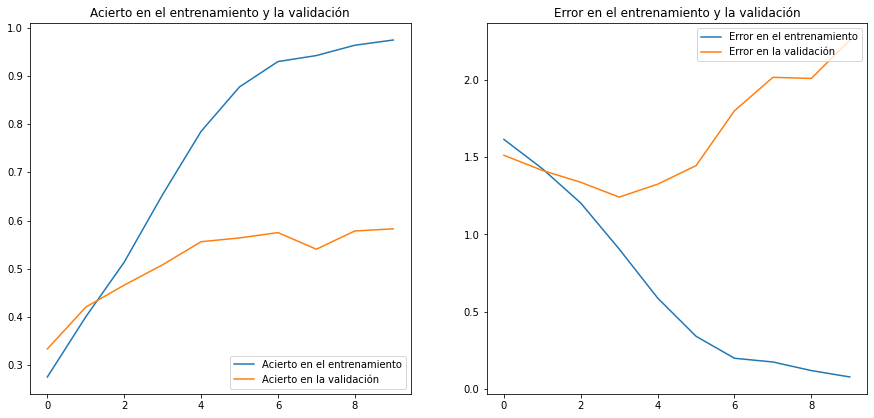

In [26]:
history_rnn_convolucional = gestor.carga_pickle(path_modelos, 'history_rnn_convolucional_data_origin.sav')
fig = plotter.representa_accuracy_loss_rnn(history_rnn_convolucional, epochs_range=10)
plotter.guardar_figura(fig, 'acierto_error_rnn_convolucional.jpg', ruta)

Ha obtenido buen resultado de score como primera aproximación, con un 58% y se queda muy cerca del modelo de Random Forest. La métrica que más importa para este modelo es el porcentaje de acierto, `accuracy`, y aunque el error se dispara a partir de la quinta iteración, es por muy poca magnitud, y el acierto se mantiena. Se prueba con la imágenes de test para comprobar su eficiencia.

In [11]:
modelo_rnn_convolucional = gestor.carga_modelo_rnn(path_modelos, 'modelo_rnn_convolucional_data_origin.h5')
clasificador_ml.resultado_test_rnn(modelo_rnn_convolucional, data_test_rnn)

Los resultados para el conjunto de test son los siguientes
Test loss: 2.4876601696014404
Test accuracy: 0.5465346574783325


El resultado se acerca al modelo Random Forest en un primer intento. Se prueba con la misma distribución de capas pero con la función de activación tangente hipérbólica.

In [10]:
"""
modelo_rnn_2, history_rnn_2 = clasificador_ml.entrena_modelo_rnn(model=20, train_ds=data_train_rnn, validation_data=data_val_rnn, epochs=10, optimizer='adam')
modelo_rnn_2.save(path_modelos + os.sep + 'modelo_rnn_2_data_origin.h5')
gestor.guarda_history_rnn(history_rnn_2, path_modelos, 'history_rnn_2_data_origin.sav')
"""

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling (Rescaling)        (None, 250, 250, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 250, 250, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 125, 125, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 125, 125, 32)      9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 62, 62, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 62, 62, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 31, 31, 64)        0

In [50]:
modelo_rnn_2 = gestor.carga_modelo_rnn(path_modelos, 'modelo_rnn_2_data_origin.h5')
clasificador_ml.resultado_test_rnn(modelo_rnn_2, data_test_rnn)

Los resultados para el conjunto de test son los siguientes
Test loss: 1.6178430318832397
Test accuracy: 0.20000000298023224



Con la función de activación tangente hiperbólica con la misma distribución de capas, se comprueba que no aprende la red. Se prueba también con `kernell_init = uniform`, con el optimizador `sgd` y con la función de activación sigmoidea con malos resultados, la red en las sucesivas iteraciones no va aprendiendo y se para el modelo. 

A continuación se prueba con la misma distribuciónd de capas pero con más épocas, con 100, poniendo el early stop a 10 épocas midiendo el porcentaje de acierto `accuracy`.

In [9]:
"""
modelo_rnn_3, history_rnn_3 = clasificador_ml.entrena_modelo_rnn(model=10, train_ds=data_train_rnn, validation_data=data_val_rnn, epochs=1000, optimizer='adam')
modelo_rnn_3.save(path_modelos + os.sep + 'modelo_rnn_3_data_origin.h5')
gestor.guarda_history_rnn(history_rnn_3, path_modelos, 'history_rnn_3_data_origin.sav')
"""

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling (Rescaling)        (None, 250, 250, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 250, 250, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 125, 125, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 125, 125, 32)      9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 62, 62, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 62, 62, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 31, 31, 64)        0

La red aprende pero se para en las 15 épocas por el `early stop`. Se llega a un 58% de acierto en validación. Se comprueba a continuación el resultado con el conjunto de test. 

In [12]:
modelo_rnn_3 = gestor.carga_modelo_rnn(path_modelos, 'modelo_rnn_3_data_origin.h5')
clasificador_ml.resultado_test_rnn(modelo_rnn_3, data_test_rnn)

Los resultados para el conjunto de test son los siguientes
Test loss: 2.5228567123413086
Test accuracy: 0.5722772479057312


El modelo está cercano al modelo Random Forest, pero todavía por debajo. Se comprueba la evolución de los errores y aciertos en las iteraciones.

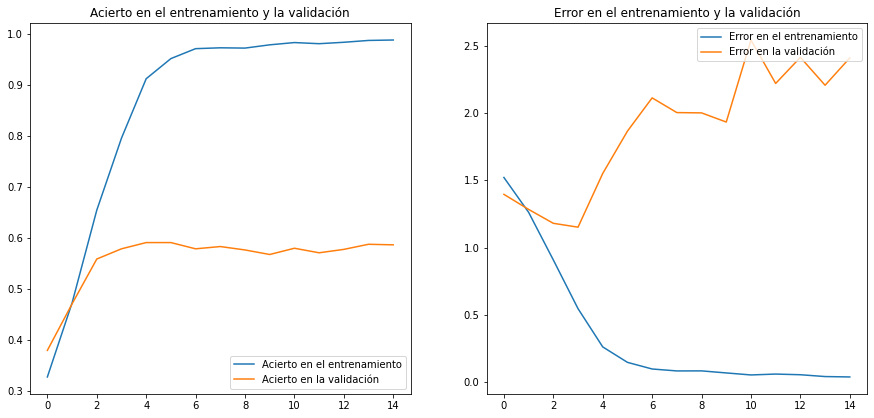

In [16]:
history_rnn_3 = gestor.carga_pickle(path_modelos, 'history_rnn_3_data_origin.sav')
fig = plotter.representa_accuracy_loss_rnn(history_rnn_3, epochs_range=15)
plotter.guardar_figura(fig, 'acierto_error_rnn_3.jpg', ruta)

Se aprecia que el resultado se mejora. Al observar la evolución `val_accuracy` y `val_loss` para esta red, parece que la iteración 4 es la que mejor resultados da. Se prueba a continuación con esta misma red neuronal con 4 épocas. 

In [13]:
"""
modelo_rnn_4, history_rnn_4 = clasificador_ml.entrena_modelo_rnn(model=10, train_ds=data_train_rnn, validation_data=data_val_rnn, epochs=4, optimizer='adam')
modelo_rnn_4.save(path_modelos + os.sep + 'modelo_rnn_4_data_origin.h5')
gestor.guarda_history_rnn(history_rnn_4, path_modelos, 'history_rnn_4_data_origin.sav')
"""

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling (Rescaling)        (None, 250, 250, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 250, 250, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 125, 125, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 125, 125, 32)      9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 62, 62, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 62, 62, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 31, 31, 64)        0

In [13]:
modelo_rnn_4 = gestor.carga_modelo_rnn(path_modelos, 'modelo_rnn_4_data_origin.h5')
clasificador_ml.resultado_test_rnn(modelo_rnn_4, data_test_rnn)

Los resultados para el conjunto de test son los siguientes
Test loss: 1.3502215147018433
Test accuracy: 0.4653465449810028


Se obtienen peores resultados, con lo que el aumento de épocas sí que mejora el aprendizaje del modelo. Se prueba con otra distribución de capas:

1. `Conv2D` Se usarán los siguientes parámetros:
- `filters` - 32.
- `kernel_size` - (3 x 3).
- `activation` - `relu`.
- `input_shape` - que es el tamaño de las imágenes, en este caso es 250x 250.
- `kernel_initializer` - 'he_normal'

2. `MaxPooling2D` Los parámetros que se usan aquí son:
- `pool_size`, en este caso (2,2).
- `filters` - 32.

3. `Conv2D` Con los siguientes parámetros:
- `filters` - 64.
- `kernel_size` - (3 x 3).
- `activation` -  `relu`.

4. `MaxPooling2D` con los parámetros:
- `pool_size`, en este caso (2,2).
- `filters` - 32.

5. `Conv2D` Con los siguientes parámetros:
- `filters` - 128.
- `kernel_size` - (3 x 3).
- `activation` -  `relu`.

6. `Flatten` para aplanar las matrices y transformarlas en vecotres. Se usa sin parámetros. <p><p>

7. `Dense` es la capa previa al final sin transformaciones, sólo con filtro y función de activación. En este caso:
- `filters` - 128
- `activation` -  `relu`.

8. `Dense` los parámetros son:
- `filters` - 5
- `activation` -  `softmax`.

Para la compilación del modelo se usarán los siguientes parámetros:

- `optimizer` = Adam(), 
- `loss` = tf.keras.losses.CategoricalCrossentropy() 
- `metrics` = 'accuracy'

In [10]:
"""
modelo_rnn_5, history_rnn_5 = clasificador_ml.entrena_modelo_rnn(model=30, train_ds=data_train_rnn, validation_data=data_val_rnn, epochs=10, optimizer='adam')
modelo_rnn_5.save(path_modelos + os.sep + 'modelo_rnn_5_data_origin.h5')
gestor.guarda_history_rnn(history_rnn_5, path_modelos, 'history_rnn_5_data_origin.sav')
"""

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 248, 248, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 124, 124, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 122, 122, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 61, 61, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 59, 59, 128)       73856     
_________________________________________________________________
flatten (Flatten)            (None, 445568)            0         
_________________________________________________________________
dense (Dense)                (None, 128)               5

In [14]:
modelo_rnn_5 = gestor.carga_modelo_rnn(path_modelos, 'modelo_rnn_5_data_origin.h5')
clasificador_ml.resultado_test_rnn(modelo_rnn_5, data_test_rnn)

Los resultados para el conjunto de test son los siguientes
Test loss: 4.985194206237793
Test accuracy: 0.38019803166389465


Se prueba esta misma distribución de capas preo añadiendo capas `dropout` para evitar el sobreentrenamiento que se ve que está teniendo el modelo:

1. `Conv2D` Se usarán los siguientes parámetros:
- `filters` - 32.
- `kernel_size` - (3 x 3).
- `activation` - `relu`.
- `input_shape` - que es el tamaño de las imágenes, en este caso es 250x 250.
- `kernel_initializer` - 'he_normal'

2. `MaxPooling2D` Los parámetros que se usan aquí son:
- `pool_size`, en este caso (2,2).
- `filters` - 32.

3. `Dropout`con un porcentaje de un 25%. <p><p>

4. `Conv2D` Con los siguientes parámetros:
- `filters` - 64.
- `kernel_size` - (3 x 3).
- `activation` -  `relu`.

5. `MaxPooling2D` con los parámetros:
- `pool_size`, en este caso (2,2).
- `filters` - 32.

6. `Dropout`con un porcentaje de un 25%. <p><p>

7. `Conv2D` Con los siguientes parámetros:
- `filters` - 128.
- `kernel_size` - (3 x 3).
- `activation` -  `relu`.

8. `Dropout`con un porcentaje de un 40%. <p><p>

9. `Flatten` para aplanar las matrices y transformarlas en vecotres. Se usa sin parámetros. <p><p>

10. `Dense` es la capa previa al final sin transformaciones, sólo con filtro y función de activación. En este caso:
- `filters` - 128
- `activation` -  `relu`.

11. `Dropout`con un porcentaje de un 30%. <p><p>

12. `Dense` los parámetros son:
- `filters` - 5
- `activation` -  `softmax`.

Para la compilación del modelo se usarán los siguientes parámetros:

- `optimizer` = Adam(), 
- `loss` = tf.keras.losses.CategoricalCrossentropy() 
- `metrics` = 'accuracy'



In [10]:
"""
modelo_rnn_6, history_rnn_6 = clasificador_ml.entrena_modelo_rnn(model=40, train_ds=data_train_rnn, validation_data=data_val_rnn, epochs=10, optimizer='adam')
modelo_rnn_6.save(path_modelos + os.sep + 'modelo_rnn_6_data_origin.h5')
gestor.guarda_history_rnn(history_rnn_6, path_modelos, 'history_rnn_6_data_origin.sav')
"""

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 248, 248, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 124, 124, 32)      0         
_________________________________________________________________
dropout (Dropout)            (None, 124, 124, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 122, 122, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 61, 61, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 61, 61, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 59, 59, 128)       7

In [11]:
modelo_rnn_6 = gestor.carga_modelo_rnn(path_modelos, 'modelo_rnn_6_data_origin.h5')
clasificador_ml.resultado_test_rnn(modelo_rnn_6, data_test_rnn)

Los resultados para el conjunto de test son los siguientes
Test loss: 1.6304163932800293
Test accuracy: 0.2415841519832611


Este modelo aprende muy lento pero muy compensado el porcentaje de entrenamiento y de validación. Parece buena señal para evitar el sobreentrenamiento. Se aumentan el número de épocas para intentar llegar a un porcentaje de acierto más alto. 

In [11]:
"""
modelo_rnn_7, history_rnn_7 = clasificador_ml.entrena_modelo_rnn(model=40, train_ds=data_train_rnn, validation_data=data_val_rnn, epochs=150, optimizer='adam')
modelo_rnn_7.save(path_modelos + os.sep + 'modelo_rnn_7_data_origin.h5')
gestor.guarda_history_rnn(history_rnn_7, path_modelos, 'history_rnn_7_data_origin.sav')
"""

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 248, 248, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 124, 124, 32)      0         
_________________________________________________________________
dropout (Dropout)            (None, 124, 124, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 122, 122, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 61, 61, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 61, 61, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 59, 59, 128)       7

In [12]:
modelo_rnn_7 = gestor.carga_modelo_rnn(path_modelos, 'modelo_rnn_7_data_origin.h5')
clasificador_ml.resultado_test_rnn(modelo_rnn_7, data_test_rnn)

Los resultados para el conjunto de test son los siguientes
Test loss: 1.673708200454712
Test accuracy: 0.21980197727680206


Se comprueba que no funciona esta distribución de capas. Se utiliza ahora un algoritmo de aprendizaje no supervisado para clusterizar los colores y disminuirlos hasta 25 para obtener una muestra modificada para comprobar si encuentra mejor los patrones.

# Aprendizaje no supervisado



Hasta el momento se ha conseguido un acierto máximo de un 61% y con todas las pruebas hechas no se mejoran los resultados. Se prueba a modificar los datos, en este caso las imágenes, para probar si funciona mejor. 

Se prueba el algoritmo de aprendizaje no supervisado KNN para clusterizar los colores de las imágenes y bajarlos hasta 25, de forma que se simplifiquen los cálculos. Se genera todo un dataset nuevo guardado como dataset modificado. 

In [10]:
"""
organizador.no_supervisado_kmeans_rebaja_colores(ruta=ruta, etiquetas=['deco_', 'nouveau_', 'intern_', 'postm_', 'decons_'], seed=seed)
"""

Las fotografías de la etiqueta Art_Deco se han bajado a 25 colores con knn
Las fotografías de la etiqueta Art_Nouveau se han bajado a 25 colores con knn
Las fotografías de la etiqueta Internacional se han bajado a 25 colores con knn
Las fotografías de la etiqueta Postmoderno se han bajado a 25 colores con knn
Las fotografías de la etiqueta Deconstructivismo se han bajado a 25 colores con knn


Se muestra a continuación una muestra del dataset que se va a utilizar.

Found 7473 files belonging to 5 classes.


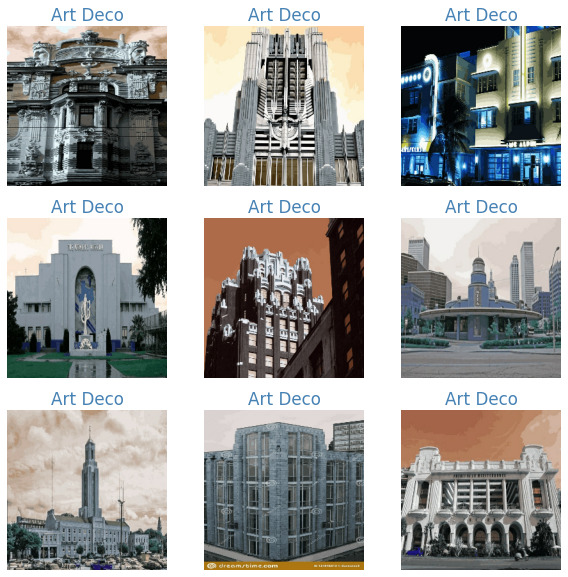

In [19]:
data_modificado = organizador.get_data_tensor(path=(ruta + os.sep + 'data' + os.sep + 'dataset_modificado'), seed=seed, validation_split=None, subset=None, test=True)
fig = plotter.visualiza_fotos(data_modificado)
plotter.guardar_figura(fig, 'muestra_imágenes_dataset_modificado', ruta)

Se cargan estos nuevos datos y se prueba con la red neuronal que mejores resultados dió: 

1. `rescaling`. Con el parámetro:
- `input_shape` - que es el tamaño de las imágenes, en este caso es 250x 250.

2. `Conv2D` Se usarán los siguientes parámetros:
- `filters` - 32.
- `kernel_size` - (3 x 3).
- `activation` - `relu`.

3. `MaxPooling2D` Los parámetros que se usan aquí son:
- `pool_size`, en este caso (2,2).
- `filters` - 32.

4. `Conv2D` Con los siguientes parámetros:
- `filters` - 32.
- `kernel_size` - (3 x 3).
- `activation` -  `relu`.

5. `MaxPooling2D` con los parámetros:
- `pool_size`, en este caso (2,2).
- `filters` - 32.

6. `Conv2D` Con los siguientes parámetros:
- `filters` - 64.
- `kernel_size` - (3 x 3).
- `activation` -  `relu`.

7. `MaxPooling2D` con los parámetros:
- `pool_size`, en este caso (2,2).
- `filters` - 64.

8. `Dropout` En este caso con un porcentaje de un 40%. <p><p>

9. `Flatten`  Se usa sin parámetros. <p><p>

10. `Dense` En este caso:
- `filters` - 128
- `activation` -  `relu`.

11. `Dense` los parámetros son:
- `filters` - 5
- `activation` -  `softmax`.

Para la compilación del modelo se usarán los siguientes parámetros:

- `optimizer` = Adam(), 
- `loss` = tf.keras.losses.CategoricalCrossentropy() 
- `metrics` = 'accuracy'

In [9]:
path_data_modificado = ruta + os.sep + 'data' + os.sep + 'dataset_modificado'
data_train_rnn_modificado = organizador.get_data_tensor(path=path_data_modificado, seed=seed, validation_split=0.2, subset='training')
data_val_rnn_modificado = organizador.get_data_tensor(path=path_data_modificado, seed=seed, validation_split=0.2, subset='validation')
data_train_rnn_modificado = organizador.configure_for_performance(data_train_rnn_modificado)
data_val_rnn_modificado = organizador.configure_for_performance(data_val_rnn_modificado)

Found 7473 files belonging to 5 classes.
Using 5979 files for training.
Found 7473 files belonging to 5 classes.
Using 1494 files for validation.


In [18]:
"""
modelo_rnn_8, history_rnn_8 = clasificador_ml.entrena_modelo_rnn(model=10, train_ds=data_train_rnn_modificado, validation_data=data_val_rnn_modificado, epochs=15, optimizer='adam')
modelo_rnn_8.save(path_modelos + os.sep + 'modelo_rnn_8_data3.h5')
gestor.guarda_history_rnn(history_rnn_8, path_modelos, 'history_rnn_8_data3.sav')
"""

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling (Rescaling)        (None, 250, 250, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 250, 250, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 125, 125, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 125, 125, 32)      9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 62, 62, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 62, 62, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 31, 31, 64)        0

Los datos están funcionando mejor y el algoritmo parece que seguiría aprendiendo. Se ha quedado en un 68,55% de acierto. casi un 70%, lo que supone una gran mejora. A continuación se hace data augmentation para el nuevo dataset y se separa en train y test para poder comprobar si mejora los resultados. 

## Data augmentation de las imágenes clusterizadas con KNN

Las imágenes se generan de manera aleatoria cambiando los parámetros de rotación, zoom o color, alternando al azar entre los siguientes parámetros, los mismos utilizados anteriormente: <p><p>

- `rotation_range = 30`     Rotación de las imágenes con un ángulo de 30 grados. <p><p>
- `zoom_range = 0.2`        Zoom con un porcentaje de un 20% tanto para alejar como para acercar. <p><p>
- `width_shift_range=0.1`   Cambio en la proporción de anchura con un 10% de variación. <p><p>
- `height_shift_range=0.1`  Cambio en la proporción de altura con un 10% de variación. <p><p>
- `horizontal_flip = True`  Gira horizontalmente de manera aleatoria. <p><p>
- `fill_mode="nearest"`     Se rellenan las zonas que se crean nuevas con el criterio de píxeles más cercanos. <p><p>
- `shear_range=0.15`        Ángulo de corte en dirección de las agujas del reloj. <p><p>
- `vertical_flip=False`     Se desactiva el giro vertical. <p><p>

In [14]:
"""
images_deco_modificado = organizador.carga_imagenes_etiqueta(data_dir=path_data_modificado, label=labels[0])
images_nouveau_modificado = organizador.carga_imagenes_etiqueta(data_dir=path_data_modificado, label=labels[1])
images_intern_modificado = organizador.carga_imagenes_etiqueta(data_dir=path_data_modificado, label=labels[2])
images_postm_modificado = organizador.carga_imagenes_etiqueta(data_dir=path_data_modificado, label=labels[3])
images_decons_modificado = organizador.carga_imagenes_etiqueta(data_dir=path_data_modificado, label=labels[4])
"""

In [15]:
"""
organizador.genera_nuevos(images=images_deco_modificado, save_path=(path_data_modificado + os.sep + labels[0]), save_prefix='deco_aug', number=735, color=True)
organizador.genera_nuevos(images=images_nouveau_modificado, save_path=(path_data_modificado + os.sep + labels[1]), save_prefix='nouveau_aug', number=720, color=True)
organizador.genera_nuevos(images=images_intern_modificado, save_path=(path_data_modificado + os.sep + labels[2]), save_prefix='intern_aug', number=873, color=True)
organizador.genera_nuevos(images=images_postm_modificado, save_path=(path_data_modificado + os.sep + labels[3]), save_prefix='postm_aug', number=1019, color=True)
organizador.genera_nuevos(images=images_decons_modificado, save_path=(path_data_modificado + os.sep + labels[4]), save_prefix='decons_aug', number=1043, color=True)
"""

In [15]:
"""
organizador.separa_train_test(path_data_modificado, test_ratio=0.10)
"""

Test_Train for label Art_Deco -------------
Total images:  1496
Training:  1346
Testing:  150


Test_Train for label Art_Nouveau -------------
Total images:  1497
Training:  1347
Testing:  150


Test_Train for label Internacional -------------
Total images:  1483
Training:  1334
Testing:  149


Test_Train for label Postmoderno -------------
Total images:  1501
Training:  1350
Testing:  151


Test_Train for label Deconstructivismo -------------
Total images:  1501
Training:  1350
Testing:  151




In [10]:
path_train_modificado = ruta + os.sep + 'data' + os.sep + 'dataset_modificado_train'
path_test_modificado = ruta + os.sep + 'data' + os.sep + 'dataset_modificado_test'

data_train_rnn_modificado = organizador.get_data_tensor(path=path_train_modificado, seed=seed, validation_split=0.2, subset='training')
data_val_rnn_modificado = organizador.get_data_tensor(path=path_train_modificado, seed=seed, validation_split=0.2, subset='validation')
data_test_rnn_modificado = organizador.get_data_tensor(path=path_test_modificado, seed=seed, validation_split=None, subset=None)

data_train_rnn_modificado = organizador.configure_for_performance(data_train_rnn_modificado)
data_val_rnn_modificado = organizador.configure_for_performance(data_val_rnn_modificado)
data_test_rnn_modificado = organizador.configure_for_performance(data_test_rnn_modificado)

Found 6722 files belonging to 5 classes.
Using 5378 files for training.
Found 6722 files belonging to 5 classes.
Using 1344 files for validation.
Found 751 files belonging to 5 classes.


El nuevo dataset modificado se queda como se muestra a continuación

Found 7473 files belonging to 5 classes.


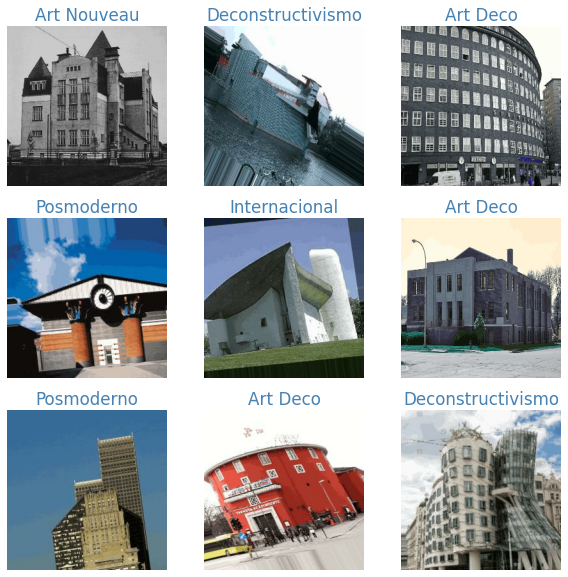

In [20]:
data_modificado = organizador.get_data_tensor(path=(ruta + os.sep + 'data' + os.sep + 'dataset_modificado'), seed=seed, validation_split=None, subset=None)
fig = plotter.visualiza_fotos(data_modificado)
plotter.guardar_figura(fig, 'muestra_imágenes_dataset_modificado_aumentado', ruta)

In [14]:
"""
modelo_rnn_9, history_rnn_9 = clasificador_ml.entrena_modelo_rnn(model=10, train_ds=data_train_rnn_modificado, validation_data=data_val_rnn_modificado, epochs=10, optimizer='adam')
modelo_rnn_9.save(path_modelos + os.sep + 'modelo_rnn_9_data1.h5')
gestor.guarda_history_rnn(history_rnn_9, path_modelos, 'history_rnn_9_data1.sav')
"""


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_4 (Rescaling)      (None, 250, 250, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 250, 250, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 125, 125, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 125, 125, 32)      9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 62, 62, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 62, 62, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 31, 31, 64)        0

In [54]:
modelo_rnn_9 = gestor.carga_modelo_rnn(path_modelos, 'modelo_rnn_9_data1.h5')
clasificador_ml.resultado_test_rnn(modelo_rnn_9, data_test_rnn_modificado)

Los resultados para el conjunto de test son los siguientes
Test loss: 2.9336678981781006
Test accuracy: 0.504660427570343


Parece que funciona mejor sin data agumentatition con lo que no ha sido una buena opción.

Se prueba a clusterizar los colores de las imagenes generadas por data augmentation para aumentar el dataset en vez de hacer data agumentation de las imagenes resultado del algortimo knn.

## Aprendizaje no supervisado(KNN) de las imágenes nuevas generadas por data augmentation
 

El proceso se repite en orden inverso, con las imágenes generadas por `ImageDataGenerator` previamente, usando el algoritmo KNN a 25 colores al igual que con las imágenes originales del dataset.

Para ello se crea una copia del dataset con el nombre dataset modificado 2, y se separa en tres muestras, entrenamiento, validación y test. 

In [11]:
ruta_origen = ruta + os.sep + 'data' + os.sep + 'dataset_modificado'
ruta_destino = ruta + os.sep + 'data' + os.sep + 'dataset_modificado_2'

In [10]:
"""
organizador.make_copy_dataset(root_dir=ruta_origen, 
                                label=labels, etiquetas=['deco_knn_', 'nouveau_knn_', 'intern_knn_', 'postm_knn_', 'decons_knn_'], 
                                root_destiny=ruta_destino)
"""

In [11]:
"""
organizador.no_supervisado_knn_rebaja_colores(ruta=ruta, 
                                                etiquetas=['deco_aug_', 'nouveau_aug_', 'intern_aug_', 'postm_aug_', 'decons_aug_'], 
                                                seed=seed, makedirs=False , 
                                                ruta_origen=None, 
                                                ruta_destino=ruta_destino)
"""

Las fotografías de la etiqueta Art_Deco se han bajado a 25 colores con knn
Las fotografías de la etiqueta Art_Nouveau se han bajado a 25 colores con knn
Las fotografías de la etiqueta Internacional se han bajado a 25 colores con knn
Las fotografías de la etiqueta Postmoderno se han bajado a 25 colores con knn
Las fotografías de la etiqueta Deconstructivismo se han bajado a 25 colores con knn


In [12]:
"""
organizador.separa_train_test(ruta_destino, test_ratio=0.10)
"""

Test_Train for label Art_Deco -------------
Total images:  995
Training:  895
Testing:  100


Test_Train for label Art_Nouveau -------------
Total images:  996
Training:  896
Testing:  100


Test_Train for label Internacional -------------
Total images:  983
Training:  884
Testing:  99


Test_Train for label Postmoderno -------------
Total images:  1000
Training:  900
Testing:  100


Test_Train for label Deconstructivismo -------------
Total images:  1000
Training:  900
Testing:  100




In [12]:
path_train_modificado_2 = ruta + os.sep + 'data' + os.sep + 'dataset_modificado_2_train'
path_test_modificado_2 = ruta + os.sep + 'data' + os.sep + 'dataset_modificado_2_test'

data_train_rnn_modificado_2 = organizador.get_data_tensor(path=path_train_modificado_2, seed=seed, validation_split=0.2, subset='training')
data_val_rnn_modificado_2 = organizador.get_data_tensor(path=path_train_modificado_2, seed=seed, validation_split=0.2, subset='validation')
data_test_rnn_modificado_2 = organizador.get_data_tensor(path=path_test_modificado_2, seed=seed, validation_split=None, subset=None)

data_train_rnn_modificado_2 = organizador.configure_for_performance(data_train_rnn_modificado_2)
data_val_rnn_modificado_2 = organizador.configure_for_performance(data_val_rnn_modificado_2)
data_test_rnn_modificado_2 = organizador.configure_for_performance(data_test_rnn_modificado_2)

Found 4475 files belonging to 5 classes.
Using 3580 files for training.
Found 4475 files belonging to 5 classes.
Using 895 files for validation.
Found 499 files belonging to 5 classes.


Se muestra el nuevo dataset a continuación. Con este dataset se volverá a probar la primera red neuronal, que dió los mejores resultados. 

Found 4974 files belonging to 5 classes.


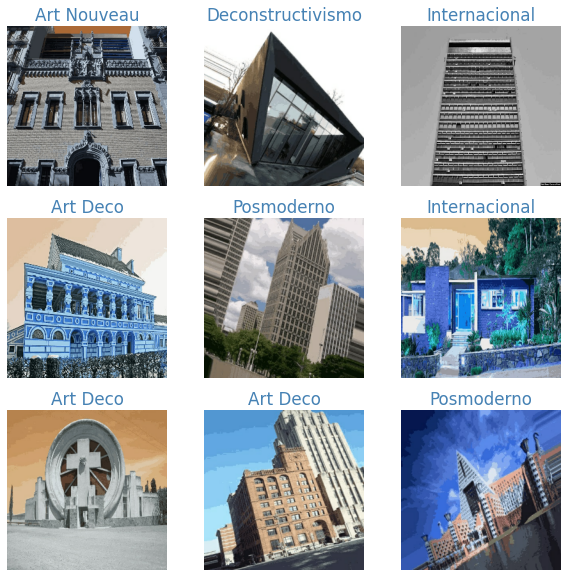

In [21]:
data_modificado_2 = organizador.get_data_tensor(path=(ruta + os.sep + 'data' + os.sep + 'dataset_modificado_2'), seed=seed, validation_split=None, subset=None)
fig = plotter.visualiza_fotos(data_modificado_2)
plotter.guardar_figura(fig, 'muestra_imágenes_dataset_modificado_2', ruta)

In [18]:
"""
modelo_rnn_10, history_rnn_10 = clasificador_ml.entrena_modelo_rnn(model=10, train_ds=data_train_rnn_modificado_2, validation_data=data_val_rnn_modificado_2, epochs=50, optimizer='adam')
modelo_rnn_10.save(path_modelos + os.sep + 'modelo_rnn_10_data2.h5')
gestor.guarda_history_rnn(history_rnn_10, path_modelos, 'history_rnn_10_data2.sav')
"""

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_1 (Rescaling)      (None, 250, 250, 3)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 250, 250, 32)      896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 125, 125, 32)      0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 125, 125, 32)      9248      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 62, 62, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 62, 62, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 31, 31, 64)       

In [55]:
modelo_rnn_10 = gestor.carga_modelo_rnn(path_modelos, 'modelo_rnn_10_data2.h5')
clasificador_ml.resultado_test_rnn(modelo_rnn_10, data_test_rnn_modificado_2)

Los resultados para el conjunto de test son los siguientes
Test loss: 3.176589250564575
Test accuracy: 0.5911823511123657


La red no aprende bien con estos datos y no mejora los resultados obtenidos anteriormente. 

## Random Forest con datos modificados

Se prueba ahora con Random Forest y los datos que mejor funcionan. Se separa este conjunto de datos como dataset_modificado 3 con su conjunto de entrenamiento y de test. 

In [13]:
ruta_origen_3 = ruta + os.sep + 'data' + os.sep + 'dataset_modificado'
ruta_destino_3 = ruta + os.sep + 'data' + os.sep + 'dataset_modificado_3'

In [21]:
"""
organizador.make_copy_dataset(root_dir=ruta_origen_3, 
                                label=labels, etiquetas=['deco_knn_', 'nouveau_knn_', 'intern_knn_', 'postm_knn_', 'decons_knn_'], 
                                root_destiny=ruta_destino_3)
"""

In [22]:
"""
organizador.separa_train_test(ruta_destino_3, test_ratio=0.05)
"""

Test_Train for label Art_Deco -------------
Total images:  760
Training:  722
Testing:  38


Test_Train for label Art_Nouveau -------------
Total images:  776
Training:  737
Testing:  39


Test_Train for label Internacional -------------
Total images:  610
Training:  579
Testing:  31


Test_Train for label Postmoderno -------------
Total images:  481
Training:  456
Testing:  25


Test_Train for label Deconstructivismo -------------
Total images:  457
Training:  434
Testing:  23




In [10]:
path_train_modificado_3 = ruta + os.sep + 'data' + os.sep + 'dataset_modificado_3_train'
path_test_modificado_3 = ruta + os.sep + 'data' + os.sep + 'dataset_modificado_3_test'

data_train_rnn_modificado_3 = organizador.get_data_tensor(path=path_train_modificado_3, seed=seed, validation_split=0.2, subset='training')
data_val_rnn_modificado_3 = organizador.get_data_tensor(path=path_train_modificado_3, seed=seed, validation_split=0.2, subset='validation')
data_test_rnn_modificado_3 = organizador.get_data_tensor(path=path_test_modificado_3, seed=seed, validation_split=None, subset=None, test=True)

data_train_rnn_modificado_3 = organizador.configure_for_performance(data_train_rnn_modificado_3)
data_val_rnn_modificado_3 = organizador.configure_for_performance(data_val_rnn_modificado_3)
data_test_rnn_modificado_3 = organizador.configure_for_performance(data_test_rnn_modificado_3)

Found 2928 files belonging to 5 classes.
Using 2343 files for training.
Found 2928 files belonging to 5 classes.
Using 585 files for validation.
Found 156 files belonging to 5 classes.


In [11]:
x_train_modificado_3, y_train_modificado_3 = organizador.get_data(data_dir=path_train_modificado_3, flatten=True, color=True)
x_test_modificado_3, y_test_modificado_3 = organizador.get_data(data_dir=path_test_modificado_3, flatten=True, color=True)
train_test_modificado_3 = (x_train_modificado_3, x_test_modificado_3, y_train_modificado_3, y_test_modificado_3)

In [167]:
mejor_forest_datos_modificados = clasificador_ml.randomforest_cal_stimators(x_train_modificado_3, y_train_modificado_3, seed, path_modelos, train_test=train_test_modificado_3, n_stimators=1000, max_features=3, n_splits=10)
gestor.guarda_pickle(mejor_forest_datos_modificados, path_modelos, 'modelo_mejor_forest_datos_modificados_data3.sav')

Iteración: 1
val_size: 293
Score val: 0.7235494880546075
Score train: 0.9988614800759014
##########################
##########################
Iteración: 2
val_size: 293
Score val: 1.0
Score train: 0.9810246679316889
##########################
##########################
Iteración: 3
val_size: 293
Score val: 0.9965870307167235
Score train: 0.9943074003795066
##########################
##########################
Iteración: 4
val_size: 293
Score val: 0.9965870307167235
Score train: 0.9977229601518026
##########################
##########################
Iteración: 5
val_size: 293
Score val: 1.0
Score train: 0.9988614800759014
##########################
##########################
Iteración: 6
val_size: 293
Score val: 0.9965870307167235
Score train: 0.9992409867172676
##########################
##########################
Iteración: 7
val_size: 293
Score val: 1.0
Score train: 0.9988614800759014
##########################
##########################
Iteración: 8
val_size: 293
Score val: 0.9965

In [12]:
mejor_forest_datos_modificados = gestor.carga_pickle(path_modelos, 'modelo_mejor_forest_datos_modificados_data3.sav')
predicciones = clasificador_ml.indicativos_clasificacion(mejor_forest_datos_modificados, train_test=train_test_modificado_3)



PORCENTAJES----------------------------------------------------------
El score de acierto en el test es de: 0.7371794871794872
El score de acierto en el entrenamiento es de: 0.9989754098360656


MATRIZ_CONFUSION TEST ------------------------------------------------
[[32  5  1  0  0]
 [13 26  0  0  0]
 [ 3  3 25  0  0]
 [ 3  3  2 17  0]
 [ 0  6  1  1 15]]


MATRIZ_CONFUSION ENTRENAMIENTO ---------------------------------------
[[722   0   0   0   0]
 [  1 736   0   0   0]
 [  0   0 579   0   0]
 [  0   0   2 454   0]
 [  0   0   0   0 434]]




In [44]:
import cv2
import numpy as np
labels = ['Art Deco', 'Art Nouveau', 'Internacional', 'Posmoderno', 'Deconstructivismo']
pic = cv2.imread('/Users/juanbayonfernandez/THE_BRIDGE/mini_ML_aws/data/data_streamlit/intern_67.jpg')
pic = cv2.cvtColor(pic,cv2.COLOR_BGR2RGB)
imagen = cv2.resize(pic, (250, 250)).flatten()
imagen = imagen.reshape(-1, 187500)
resultado = mejor_forest_datos_modificados.predict(imagen)
print(resultado[0])
probabilidad = mejor_forest_datos_modificados.predict_proba(imagen)
print(probabilidad[0][resultado[0]])
sentencia = "Esta imagen pertenece al estilo arquitectónico {} con un {:.2f} % de confianza.".format(labels[resultado[0]], 100 * probabilidad[0][resultado[0]])
print(sentencia)
resultado = mejor_forest_datos_modificados.predict(imagen)
print(resultado)

2
0.4963157894736842
Esta imagen pertenece al estilo arquitectónico Internacional con un 49.63 % de confianza.
[2]


 Mejora un 5% el acierto de la red neuronal y se queda como mejor modelo hasta el momento. Se prueban ahora las redes neuronales preentrenadas.

## Red Neuronal Preentrenada

Se prueba primero el dataset con fotografías pretratadas para disminuir a 25 clusters(colores) con aprendizaje no supervisado y se entrena un modelo VGG16. Se eligen primero estos datos porque es el conjunto que mejor resultado ha dado, con el 73% de acierto previo.

## VGG16

Se entrena el algoritmo VGG16 con los siguientes parámetros:

Capas preconfiguradas del algoritmo VGG16 

Capa `Dense` con los siguientes parámetros:
- `filters` - 512
- `activation` -  `relu`.

Capa `Dropout` En este caso con un porcentaje de un 50%. <p><p>

Capa `Dense` con los parámetros:
- `filters` - 5
- `activation` -  `softmax`.

Se detallan todos los parámetros del algoritmo a continuación.

In [8]:
"""
modelo_rnn_11, history_rnn_11 = clasificador_ml.entrena_modelo_rnn(model=50, train_ds=data_train_rnn_modificado_3, validation_data=data_val_rnn_modificado_3, epochs=15, optimizer='adam')
modelo_rnn_11.save(path_modelos + os.sep + 'modelo_rnn_11_data3.h5')
gestor.guarda_history_rnn(history_rnn_11, path_modelos, 'history_rnn_11_data3.sav')
"""

58892288/58889256 [==============================] - 4s 0us/step
Epoch 1/15
74/74 [==============================] - 493s 7s/step - loss: 14.5254 - accuracy: 0.6189 - val_loss: 1.4472 - val_accuracy: 0.7436
Epoch 2/15
74/74 [==============================] - 505s 7s/step - loss: 0.8361 - accuracy: 0.8169 - val_loss: 0.8014 - val_accuracy: 0.7880
Epoch 3/15
74/74 [==============================] - 501s 7s/step - loss: 0.5477 - accuracy: 0.8796 - val_loss: 0.7298 - val_accuracy: 0.8256
Epoch 4/15
74/74 [==============================] - 518s 7s/step - loss: 0.4334 - accuracy: 0.8895 - val_loss: 0.7433 - val_accuracy: 0.8256
Epoch 5/15
74/74 [==============================] - 480s 6s/step - loss: 0.4024 - accuracy: 0.9061 - val_loss: 0.7122 - val_accuracy: 0.8342
Epoch 6/15
74/74 [==============================] - 467s 6s/step - loss: 0.2952 - accuracy: 0.9202 - val_loss: 0.6580 - val_accuracy: 0.8615
Epoch 7/15
74/74 [==============================] - 466s 6s/step - loss: 0.2867 - accura

In [10]:
modelo_rnn_11 = gestor.carga_modelo_rnn(path_modelos, 'modelo_rnn_11_data3.h5')
clasificador_ml.resultado_test_rnn(modelo_rnn_11, data_test_rnn_modificado_3)

Los resultados para el conjunto de test son los siguientes
Test loss: 0.7769846320152283
Test accuracy: 0.8589743375778198


Se consigue un 85% de acierto y se configura como el mejor modelo probado. Se prueba otro algoritmo preentrenado, el EfficientNetB7, para ver si se puede subir el score. 

## EFFICIENTNETB2

Se entrena el algoritmo EfficientNetB2 con los siguientes parámetros:

Capas preconfiguradas del algoritmo EfficientNetB2.

Capa `Dense` con los siguientes parámetros:
- `filters` - 512
- `activation` -  `relu`.

Capa `Dropout` En este caso con un porcentaje de un 50%. <p><p>

Capa `Dense` con los parámetros:
- `filters` - 5
- `activation` -  `softmax`.

Se detallan todos los parámetros del algoritmo a continuación.

Se muestra a continuación la distribución completa de capas con sus parámetros.

In [8]:
"""
modelo_rnn_12, history_rnn_12 = clasificador_ml.entrena_modelo_rnn(model=60, train_ds=data_train_rnn_modificado_3, validation_data=data_val_rnn_modificado_3, epochs=15, optimizer='adam')
modelo_rnn_12.save(path_modelos + os.sep + 'modelo_rnn_12_data3.h5') 
gestor.guarda_history_rnn(history_rnn_12, path_modelos, 'history_rnn_12_data3.sav')
"""

31793152/31790344 [==============================] - 2s 0us/step
Epoch 1/15
74/74 [==============================] - 225s 3s/step - loss: 4.5214 - accuracy: 0.6240 - val_loss: 0.7957 - val_accuracy: 0.7231
Epoch 2/15
74/74 [==============================] - 213s 3s/step - loss: 0.6692 - accuracy: 0.7691 - val_loss: 0.6587 - val_accuracy: 0.8000
Epoch 3/15
74/74 [==============================] - 213s 3s/step - loss: 0.5568 - accuracy: 0.8122 - val_loss: 0.5854 - val_accuracy: 0.8068
Epoch 4/15
74/74 [==============================] - 209s 3s/step - loss: 0.4893 - accuracy: 0.8472 - val_loss: 0.6109 - val_accuracy: 0.8051
Epoch 5/15
74/74 [==============================] - 207s 3s/step - loss: 0.3982 - accuracy: 0.8626 - val_loss: 0.5051 - val_accuracy: 0.8513
Epoch 6/15
74/74 [==============================] - 212s 3s/step - loss: 0.3398 - accuracy: 0.8856 - val_loss: 0.6359 - val_accuracy: 0.8154
Epoch 7/15
74/74 [==============================] - 209s 3s/step - loss: 0.3250 - accurac

In [50]:
modelo_rnn_12 = gestor.carga_modelo_rnn(path_modelos, 'modelo_rnn_12_data3.h5')
clasificador_ml.resultado_test_rnn(modelo_rnn_12, data_test_rnn_modificado_3)

Los resultados para el conjunto de test son los siguientes
Test loss: 0.4530314803123474
Test accuracy: 0.8974359035491943


**Se ha conseguido casi un 90% de acierto en el test con el algoritmo `EfficientNetB2`. Se ha hecho la prueba con el mismo modelo y con el dataset con data augmentation y se comprueba que no aprende mejor. Se prueba también el algoritmo de la misma familia, el EfficientNetB7 pero no mejora los resultados. Se establece este modelo como el mejor y se se utilizará para el resto del proyecto**

# Resumen de los modelos

Se crea a continuación un dataframe resumen de todas las pruebas hechas desde el modelo base y sus respectivos resultados. 

In [ ]:
"""
dataframe_resumen = clasificador_ml.resumen_modelos(path_modelos, 
                                                    path_test_list=[path_test, path_test_modificado, path_test_modificado_2, path_test_modificado_3], 
                                                    seed=seed)
gestor.guardar_csv(dataframe_resumen, ruta=ruta, nombre='dataframe_resumen.csv')
"""

Se presenta el dataframe con los 5 mejores modelos con sus parámetros y métricas

In [6]:
df_resumen = gestor.cargar_df(ruta + os.sep + 'data' + os.sep + 'dataframe_resumen.csv')
df_resumen.sort_values(by='score', ascending=False).head(5)

,model,parameters,recall,score
0,<tensorflow.python.keras.engine.functional.Fun...,"{'name': 'model', 'layers': [{'class_name': 'I...",0.897436,0.897436
6,<tensorflow.python.keras.engine.functional.Fun...,"{'name': 'model', 'layers': [{'class_name': 'I...",0.858974,0.858974
24,"RandomForestClassifier(max_features=3, n_estim...","{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",0.737179,0.737179
2,<tensorflow.python.keras.engine.sequential.Seq...,"{'name': 'sequential', 'layers': [{'class_name...",0.653846,0.653846
12,"RandomForestClassifier(max_features=3, n_estim...","{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",0.609901,0.609901


In [7]:
df_resumen.iloc[24, 1]

"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 3, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 2000, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': True}"

Se definen lso índices para que empiecen en 1 para la representación.

In [7]:
df_resumen['new_index'] = range(1, 41)
df_resumen = df_resumen.set_index('new_index')

Se muestra a continuación el histograma con los porcenajes de aciertos de los modelos rerenciados al índice de la tabla.  

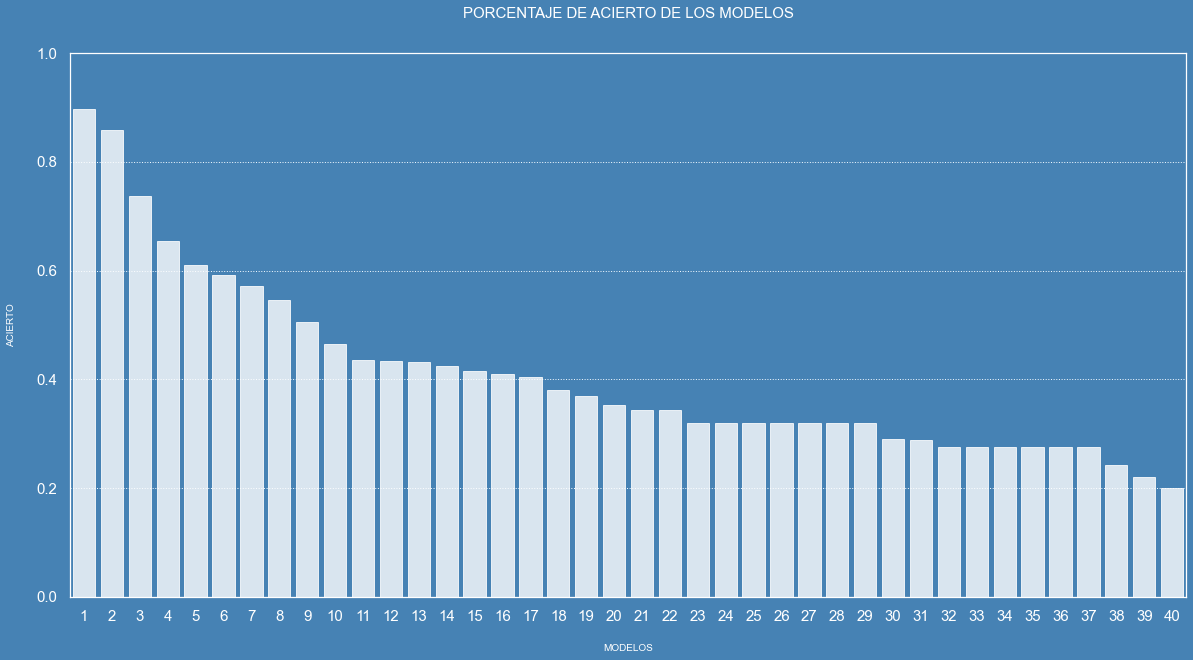

In [8]:
plotter.set_theme('c')
fig, ax = plotter.default_values(title='PORCENTAJE DE ACIERTO DE LOS MODELOS', figsize=(20, 10), ylim=[0, 1])
plotter.visualizar(kind='bar', df=df_resumen.sort_values(by='score', ascending=False), x=df_resumen.index, y='score', external_xlabel='MODELOS', external_ylabel='ACIERTO')
plotter.guardar_figura(fig, 'porcentaje_acierto_modelos', ruta)

Se muestra ahora el top 10 de los mejores, que es un mejor resumen del proceso.

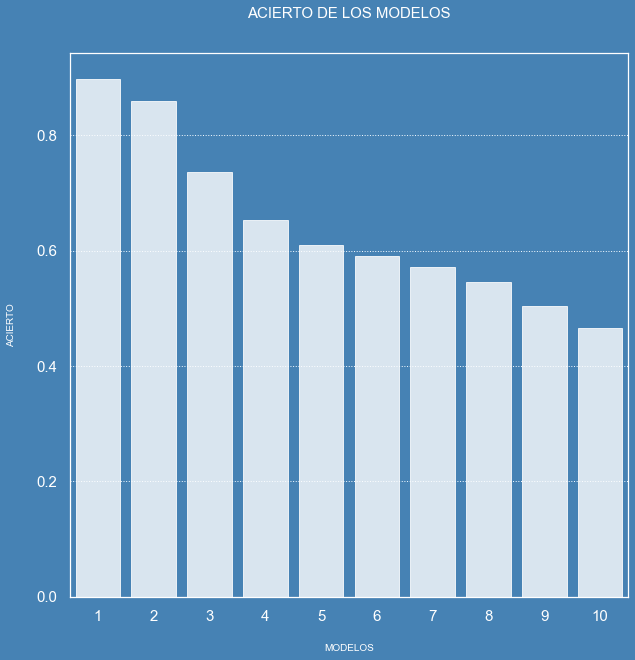

In [9]:
fig, ax = plotter.default_values(title='ACIERTO DE LOS MODELOS', figsize=(10, 10))
plotter.visualizar(kind='bar', df=df_resumen.sort_values(by='score', ascending=False).iloc[:10], x=df_resumen.iloc[:10].index, y='score', external_xlabel='MODELOS', external_ylabel='ACIERTO')
plotter.guardar_figura(fig, 'porcentaje_acierto_modelos_top10', ruta)

Con la siguiente leyenda

In [42]:
df_resumen.sort_values(by='score', ascending=False).iloc[:10]['model']

new_index
1     <tensorflow.python.keras.engine.functional.Fun...
7     <tensorflow.python.keras.engine.functional.Fun...
25    RandomForestClassifier(max_features=3, n_estim...
3     <tensorflow.python.keras.engine.sequential.Seq...
13    RandomForestClassifier(max_features=3, n_estim...
4     <tensorflow.python.keras.engine.sequential.Seq...
8     <tensorflow.python.keras.engine.sequential.Seq...
12    <tensorflow.python.keras.engine.sequential.Seq...
2     <tensorflow.python.keras.engine.sequential.Seq...
9     <tensorflow.python.keras.engine.sequential.Seq...
Name: model, dtype: object

# RESUMEN DEL PROCESO

Se ha ido siguiendo un proceso de prueba de los diferentes modelos, y testeándolos para saber que factores inciden más en los diferentes algoritmos, y buscando el mayor porcentaje posible de acierto del clasificador. 

Se partió de un **modelo base con un porcentaje de acierto de un 35% de partida.** Este porcentaje probando los diferentes algoritmos de clasificación y redes neuronales se consiguió aumentar a un 60% con un modelo Random Forest con entrenamiento en caliente y 10 conjuntos de validación cruzada. Para conseguirlo se ha realizado data augmentation del dataset. 

A partir de ese punto no se conseguía subir el acierto del 60%, que se consideraba insuficiente, por lo que se decidió **tratar las imágenes con KNN para reducir los colores a 25 en cada fotografía clusterizándolas**. Con este conjunto de datos el entrenamiento mejoró mucho con las redes neuronales y con Random Forest. Se probó a aumentar los datos con data augmentation pero sin embargo no mejoraba los resultados, por lo que se optó por usar el dataset original con las fotografías a 25 colores. 

Se probó finalmente con los algoritmos preentrenados y con el **algorimo EfficientNetB2** se consiguió el **mejor resultado, casi un 90% (89,74)**, que se consieró suficiente y se elige el modelo para utilizarlo como catalogador del proyecto, para el Streamlit que acompaña. 

# CONCLUSIONES

### - Para la clasificación de fotografías es un recurso potente usar **algortimos de aprendizaje no supervisado para mejorar los resultados.** <p><p>

### - El modelo de **Random Forest para clasificación es un modelo que tiene muy buen rendimiento** entre lo que tarda en calcular y los resultados que consigue. <p><p>

### - **La redes neuronales preentrenadas puede mejorar el aprendizaje**; para este dataset en concreto se probaron otras que no funcionaron, así que hay que probar varias para ver cuál se adapta a los datos. 


## RECURSOS DISPONIBLES

Conjuntamente con el desarrollo de este estudio se pone a disposición el material del mismo para uso público: 

- Streamlit. A ejecutar a continuación.
- API con el dataset utilizado: http://localhost:8008/get_data?eltoken=Q76903092

In [ ]:
app_path = ruta + os.sep + 'scr' + os.sep + 'dashboard' + os.sep + 'app.py'
print(app_path)

!streamlit run "PARA IR A STREAMLIT COPIA EL PATH SUPERIOR AQUÍ Y EJECUTA LA CELDA"

# DESARROLLO DE CUESTIONES PARTICULARES

Una vez que se ha desarrollado el proyecto con sus conclusiones, se hacen unos análisis extra y se da respuesta a unas cuestiones particulares. 

1. Answer the questions:

    a. Are there outliers or some rare data?
    
    b. What are the columns that have more repeated values? <p><p>
    

2. Answer the questions: <p><p>

    a. Was it possible to demonstrate the hypothesis? Why? (optional)

    b. What can you conclude about your data study?

    c. What would you change if you needed to do another DS project?

    d. What do you learn doing this project? <p><p>


3. Show different tendencies for each column in your dataset. <p><p>

5. Show the histogram of each column of your dataset with bins=5. How are the ranges painted? <p><p>

6. Which are the columns with the highest correlation? Draw the correlation matrix. <p><p>

4. Represent, in a pie chart, the time you needed for each point in the The project steps section. <p><p>

7. Save the features layers of your networks in order to do transfer learning. <p><p>

### PUNTO 1

En este tipo de dataset no hay outliers como tal, y el análisis de las fotografías demostró que no había ningún elemento extraño entre ellas. 
Al no haber columnas no se puede responder a la pregunta.

### PUNTO 2

a. El punto a no corresponde en este trabajo. 

b. Después de realizar el catalogador de imágenes puedo concluir que las fotografías tienen su propio tratamiento y el tratamiento con algoritmos de aprendizaje no supervisado previo mejoran el rendimiento de los algoritmos supervisados. 

c. Para un proyecto con tan poco tiempo elegiría probablemente otro tipo de datos, porque los resultados de cada modelo tardan en algunos casos horas. El utilizar el algoritmo KNN en todas las fotografías por ejemplo duró todo un día. 

d. Probé mucho más a fondo como funcionan las redes neuronales y aprendí a trabajar también con imágenes, ya que todos los trabajos hasta la fecha eran con datos númericos o strings. 

### PUNTO 3, 4 y 5

No se puede realizar con este tipo de dataset.

### PUNTO 6

La distribución de tiempo para el proyecto ha sido la siguiente: 

* 1.Encontrar el tema. 4 horas.

* 2.Encontrar los datos. 1 horas.

* 3.Ejecura los pasos con Python: 

    * a.Obtener los datos y analizarlos. 8 horas.

    * b.Modificar las fotos.  16 horas.

    * c.Entrenar los modelos. 36 horas.
    
    * d.Hacer la API y la página de Stremlit. 18 horas.
    
    * e.Explicación y conclusiones. 12 horas.

In [9]:
tiempos = {'Tema y datos': 5, 'Análisis y tratamiento imágenes': 24, 'API y streamlit': 12, 'Entrenar modelos': 43, 'Explicación y conclusiones': 16}

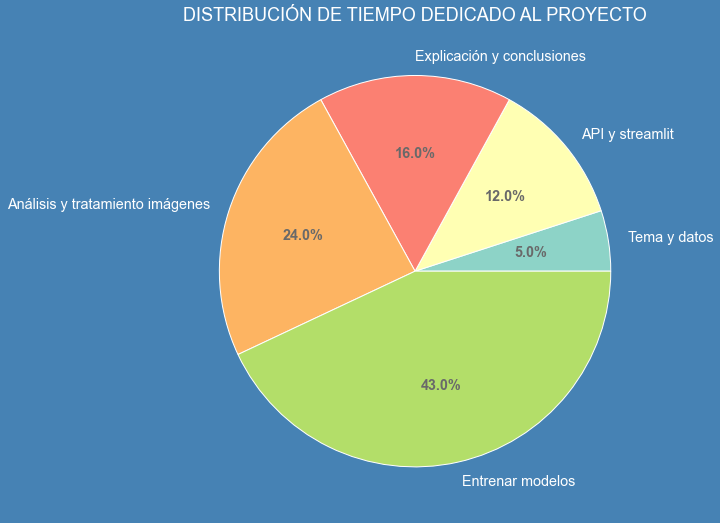

In [10]:
fig = plotter.pie_chart(pd.Series(tiempos).sort_values(), 'DISTRIBUCIÓN DE TIEMPO DEDICADO AL PROYECTO')
plotter.guardar_figura(fig, 'pie_chart', ruta)

### PUNTO 7

En el propio dataframe resumen se han guardado todos los parámetros que se pueden utilizar para generar un modelo análogo cargandolo directamentes con ellos. De igual manera se van a guardar los pesos de las capas del mejor modelo en resources para poder usarlos en transfer learning si se desea. 

In [7]:
modelo_rnn_12 = gestor.carga_modelo_rnn(path_modelos, 'modelo_rnn_12_data3.h5')
capas_mejor_modelo = clasificador_ml.guarda_capas_modelo(modelo_rnn_12)
gestor.guarda_pickle(capas_mejor_modelo, path_resources, 'capas_mejor_modelo.sav')

### SE GUARDAN AHORA LOS DATOS PERSONALES EN EL FICHERO INFO.JSON

In [8]:
data = {}
data['project_name'] = 'Clasificador de imagenes arquitectonicas'
data['author'] = 'Juan Bayon'
data['linkedin'] = 'https://www.linkedin.com/in/juan-bayon-fernandez-554a75104/'
data['e_mail'] = 'xoan311@gmail.com'
data['project_title'] = 'Clasificador de imagenes de estilos arquitectonicos del siglo XX'
data['project_description'] = 'El proyecto desarrolla un catalogador de imagenes de 5 estilos arquitectonicos representativos del siglo XX. Se prueban varios modelos de machine learning con un dataset que se modifica para buscar el mejor porcentaje de acierto y se pone a funcionar para que dada una fotografia te determine su estilo.'
data['flask_port'] = 8008
data['streamlit_port'] = 8501
data['links'] = []

In [9]:
full_paht = ruta + os.sep + 'info.json'
gestor.load_json(data, full_paht)

### SE GUARDAN AHORA LOS DATAFRAME COMO JSON PARA QUE ESTÉN DISPONIBLES PARA LA API FLASK

In [34]:
path = ruta + os.sep + 'src' + os.sep + 'api' + os.sep + 'static' + os.sep + 'df_dataset.json'
dataset_json = df_resumen_dataset.to_json()
gestor.load_json(dataset_json, path)

In [188]:
path = ruta + os.sep + 'src' + os.sep + 'api' + os.sep + 'static' + os.sep + 'df_modelos.json'
modelos_json = df_resumen.to_json()
gestor.load_json(modelos_json, path)